# Milstone 1

`DESTI RATNA KOMALA  (RMT-020)`

***Conceptual Problems***

1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

Jawaban: criterion adalah parameter-parametr yang digunakan untuk memisahkan atribut dengan tujuan untuk mengoptimalkan nilai split dari decision tree. Pada kasus ini, dipilih 2 criterion yaitu gini dan entropy, namun berdasarkan pilihan dari best parameter, yang paling bagus untuk dimodelkan adalah `entropy`. Entropy ini bekerja dengan mengukur ketidakpastian/probabilitas suatu variabel acak dengan percabangan terbaik sebesar 2 kali splitting.

2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !

Jawaban:
- pruning artinya mengidentifikasi dan membuang/memangkas cabang yang tidak diperlukan lagi pada pohon tersebut atau secara statistika bertujuan untuk mengurangi tingkat kesalahan prediksi. Pruning ini dilakukan berdasarkan nilai kepercayaan (confident level).
  - pruning dapat dilakukan dengan 2 pendekatan:
  1. pre-pruning : menghentikan pembangunan subtree di awal sebelum subtree tumbuh menjadi banyak. Selanjutnya, node akhir atau leafnya diambil dan dijadikan kelasnya pada sampel
  2. post-pruning: menyederhanakan tree dengan cara membuang beberapa cabang subtree setelah dibangung. Node yang paling jarang dipotong, akan dijadikan kelas yang paling sering muncul
- kelebihan dari decision tree adalah mudah diintegrasi dengan sistem basis data, punya ketelian yang baik, fleksible
- kekurangan: hasil kualitas keputusan tergantung dari desain pohon, akumulasi jumlah error yang cukup besar dari setiap tingkat dalam sebuah pohon, kesulitan mendesain pohon yang optimal. Pada kasus ini, pembatasan pemangkasan ccp_alpha 0.0001

3. Bagaimana cara memilih `K` yang optimal pada KNN ?

Jawaban: Semakin kecil nilai K, semakin tinggi noise yang akan mempengaruhi hasil data tersebut. Namun, semakin tinggi nilai K maka akan semakin, overfitting. Dan pada kasus ini, KKN yang digunakan adalah 25 berdasarkan best parameter.

4. Jelaskan apa yang dimaksud dengan `Cross Validation` !

Jawaban: metode untuk mengevaluasi dan membandingkan algoritma dengan cara membagi data menjadi 2 untuk belajar/melatih model. Tujuannya adalah untuk meningkatkan tingkat akurasi suatu model

5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

Jawaban:
- akurasi adalah rasio prediksi benar keseluruhan data atau tingkat kedekatan antara nilai prediksi dengan nilai aktual. Digunakan ketika ingin mengetahui berapa persen client yang benar diprediksi defaul dan tidak default dari keseluruhan client.
- precision adalah tingkat ketepatan antara informasi yang diminta dengan jawaban dari sistem. Digunakan ketika ingin mengetahui berapa persen client yang benar-benar default dari seluruh client yang diprediksi default?
- recall adalah tingkat keberhasilan sistem dalam menemukan kembali suatu informasi.  Digunakan ketika ditanyakan berapa persen client yang diprediksi default dibandingkan dengan keseluruhan clien yang sebenarnya default?
- f1 score adalah perbandingan rata-rata presisi dan recall. Digunakan ketika ingin mengetahui berapa banyak client yang terdeteksi tidak default, padahal default.

## 1. Perkenalan

### 1.1 Judul


**"Pemodelan Classification untuk memprediksi default_payment_next_month"**





### 1.2 Objective




Sebuah bank pemberi jasa credit card ingin meningkatkan jumlah client yang menggunakan credit card. Namun, berkaca dari banyaknya client yang melakukan default dan menunggak pembayaran. Oleh karena itu, diperlukan informasi mengenai perilaku client yang kemungkinan akan default dan pemodelan apakah client tersebut akan default atau tidak.Diharapkan pemodelan yang dibuat akan memiliki tingkat akurasi diatas 78% (diatas nilai akurasi null) karena jika tidak seakurat mungkin. Hal tersebut dapat menyebabkan kerugian bagi kedua belah pihak bank dan client.

## 2 Query SQL


### Data Loading dari Google Cloud Bigquery

Kolom-kolom pada dataset tersebut diubah tipe datanya di Google Cloud Bigquery sesuai dengan tabel berikut.

| Kolom | Tipe Data Awal | Tipe Data Akhir |
     | --- | --- | --- |
     | `sex` | STRING | INT |
     | `education_level` | STRING | INT |
     | `marital_status` | STRING | INT |
     | `pay_5` | STRING | FLOAT |
     | `pay_6` | STRING | FLOAT |
     | `default_payment_next_month` | STRING | INT |

Berikut adalah proses pengolahan data dari Google Cloud Bigquery:

>```
SELECT *
FROM (SELECT limit_balance,
              CAST(sex AS INT64) AS sex,
              CAST(education_level AS INT64) AS education_level,
              CAST(marital_status AS INT64) AS marital_status,
              age,
              pay_0,
              pay_2,
              pay_3,
              pay_4,
              CAST(pay_5 AS FLOAT64) AS pay_5,
              CAST(pay_6 AS FLOAT64) AS pay_6,
              bill_amt_1,
              bill_amt_2,
              bill_amt_3,
              bill_amt_4,
              bill_amt_5,
              bill_amt_6,
              pay_amt_1,
              pay_amt_2,
              pay_amt_3,
              pay_amt_4,
              pay_amt_5,
              pay_amt_6,
              CAST(default_payment_next_month AS INT64) AS default_payment_next_month
      FROM `bigquery-public-data.ml_datasets.credit_card_default`
     ) x;
```

### Menghubungkan Google colab dengan BigQuery SQL
Sebelum dilakukan pengolahan data, data akan diakses menggunakan `bigquery-public-data` pada Google Cloud Big Query. Data yang digunakan berasal dari database `ml_datasets` yang akan dikoneksikan pada`BigQuery` pada project id p1-gc2. Berikut adalah proses pengambilan data ke google colab.


In [1]:
#hubungkan google.colab dengan bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
#Import data dari bigquery ke google.cloud
from google.cloud import bigquery

In [3]:
#project id yang ingin diimport adalah "p1-gc2"
project_id = "p1-gc2"
client = bigquery.Client(project=project_id)

Project_id pada bigquery pada analisis ini adalah `"p1-gc2"` dan berdasarkan pemanggilan diatas, data tersebut berhasil terhubung dengan google colab.

### Filter Dataset pada p1-gc2

Melakukan filtering data dengan ketentuan sebagai berikut:
- jumlah limit data = 1996 x 20 =39920

In [4]:
#Filter dan limit data
dfq = client.query('''
SELECT *
FROM (SELECT limit_balance,
              CAST(sex AS INT64) AS sex,
              CAST(education_level AS INT64) AS education_level,
              CAST(marital_status AS INT64) AS marital_status,
              age,
              pay_0,
              pay_2,
              pay_3,
              pay_4,
              CAST(pay_5 AS FLOAT64) AS pay_5,
              CAST(pay_6 AS FLOAT64) AS pay_6,
              bill_amt_1,
              bill_amt_2,
              bill_amt_3,
              bill_amt_4,
              bill_amt_5,
              bill_amt_6,
              pay_amt_1,
              pay_amt_2,
              pay_amt_3,
              pay_amt_4,
              pay_amt_5,
              pay_amt_6,
              CAST(default_payment_next_month AS INT64) AS default_payment_next_month
      FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 39920
     ) x;
''').to_dataframe()
dfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   Int64  
 2   education_level             2965 non-null   Int64  
 3   marital_status              2965 non-null   Int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [5]:
#copy data dfq
dat=dfq.copy()

In [6]:
#Selanjutnya data tersebut disimpan dengan nama h8dsft_P1G2_Desti_Ratna_Komala
data= dat.to_csv('h8dsft_P1G2_Desti_Ratna_Komala.csv', index=False)
data



---



## 3 Import Libraries

Berikut adalah keseluruhan libraries yang digunakan pada analisis dataset ini.

In [7]:
#import libraries
import pandas as pd
import numpy as np

#visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#feature scalling
from sklearn.model_selection import train_test_split,GridSearchCV

#Feature encoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#accuracy
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

#import Algoritma pemodelan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#import SVC dan SVR
from sklearn.svm import SVC, SVR

#hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score

#save data
import joblib
from scipy.stats import mstats
from sklearn.compose import ColumnTransformer

## 4 Data Loading

Selanjutnya, upload data raw csv ke akun github dan panggil path data raw tersebut pada `https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/h8dsft_P1M1_desti_ratna_komala.csv`

Variabel baru `df2` dibuat untuk meng-import dataset bertipe `.csv` tersebut

In [8]:
#Untuk membaca file csv yang telah diimport dari big query, gunakan pd.read_csv dengan pd adalah pandas dan .read_csv untuk memanggil file csv
#Variable yang diberikan pada data tersebut adalah 'DataAustin'
df2 = pd.read_csv(r'https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/h8dsft_P1M1_desti_ratna_komala.csv')

In [9]:
#Copy variable
df=df2.copy()

Selanjutnya perlu diketahui dataset masing-masing fitur seperti apa.

---
***INFORMASI DATASET***

Terdapat 25 variabel pada dataset ini, diantaranya:

limit_balance: jumlah kredit yang diberikan dalam NT dolar (termasuk individual dan keluarga/tambahan kredit)

sex: Jenis kelamin Gender (1=male, 2=female)

education_level: Pendidikan (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

marital_status: Status perkawinan (1=married, 2=single, 3=others)

age: Umur dalam tahun

- **pay**

pay_0: Repayment status di September, 2005

PAY_2: Repayment status di Agustus, 2005

PAY_3: Repayment status di Juli, 2005

PAY_4: Repayment status di Juni, 2005

PAY_5: Repayment status di Mei, 2005

PAY_6: Repayment status di April, 2005

- **bill**

BILL_AMT1: Jumlah tagihan pada September, 2005 (NT dollar)

BILL_AMT2:Jumlah tagihan pada Agustus, 2005 (NT dollar)

BILL_AMT3: Jumlah tagihan pada Juli, 2005 (NT dollar)

BILL_AMT4: Jumlah tagihan pada Juni, 2005 (NT dollar)

BILL_AMT5: Jumlah tagihan pada Mei, 2005 (NT dollar)

BILL_AMT6: Jumlah tagihan pada April, 2005 (NT dollar)

- **pay_amt**

pay_amt1: Jumlah tagihan sebelumnya pada September, 2005 (NT dollar)

pay_amt2: Jumlah tagihan sebelumnya pada Agustus, 2005 (NT dollar)

pay_amt3: Jumlah tagihan sebelumnya pada Juli, 2005 (NT dollar)

pay_amt4: Jumlah tagihan sebelumnya pada Juni, 2005 (NT dollar)

pay_amt5: Jumlah tagihan sebelumnya pada Mei, 2005 (NT dollar)

pay_amt6: Jumlah tagihan sebelumnya pada April, 2005 (NT dollar)

default_payment_next_month: Default pembayaran (1=yes, 0=no)



In [10]:
#tampilkan 10 data awal
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [11]:
#tampilkan 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [12]:
#cek ukuran data
df.shape

(2965, 24)

In [13]:
#Tampilkan data unik pada tiap kolom
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

In [14]:
# menampilkan fitur pada df
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [15]:
#tampilkan default unique
df['default_payment_next_month'].unique()

array([1, 0])

In [16]:
#Tampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [17]:
#cek apakah terdapat missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [18]:
#mengecek apakah terdapat data terduplikasi?
df.duplicated().sum()

1

In [19]:
#describe data
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


## 5 Exploratory Data Analysis (EDA)



---


***Notes Hasil Data Loading:***
- Data ini memiliki 2965 baris dan 24 kolom
- Terdapat 4 kolom integer dan 20 data float
- Semua tipe data sudah sesuai dengan tipe datanya
- tidak terdapat missing value
- Terdapat 1 data terduplikasi

---



### Drop Duplikat

In [20]:
#Drop duplicate
df.drop_duplicates(inplace=True, keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2964 non-null   float64
 1   sex                         2964 non-null   int64  
 2   education_level             2964 non-null   int64  
 3   marital_status              2964 non-null   int64  
 4   age                         2964 non-null   float64
 5   pay_0                       2964 non-null   float64
 6   pay_2                       2964 non-null   float64
 7   pay_3                       2964 non-null   float64
 8   pay_4                       2964 non-null   float64
 9   pay_5                       2964 non-null   float64
 10  pay_6                       2964 non-null   float64
 11  bill_amt_1                  2964 non-null   float64
 12  bill_amt_2                  2964 non-null   float64
 13  bill_amt_3                  2964 

In [21]:
#Tampilkan list dari object dan numberikal
obj_cols= list(df.select_dtypes('object'))
num_cols= list(df.select_dtypes('number'))
print('Tipe Object: ',obj_cols)
print('Tipe Numerikal: ', num_cols)

Tipe Object:  []
Tipe Numerikal:  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


### Mengubah Nama Kolom

In [22]:
#ubah nama pay_0 menjadi pay_1 agar sama seperti bill dan pay untuk bulan september
df2.rename(columns = {'pay_0':'pay_1', 'default_payment_next_month':'default'}, inplace = True)

In [23]:
# copy variabel agar tidak hilang
df=df2.copy()

### Cek Korelasi Dataset

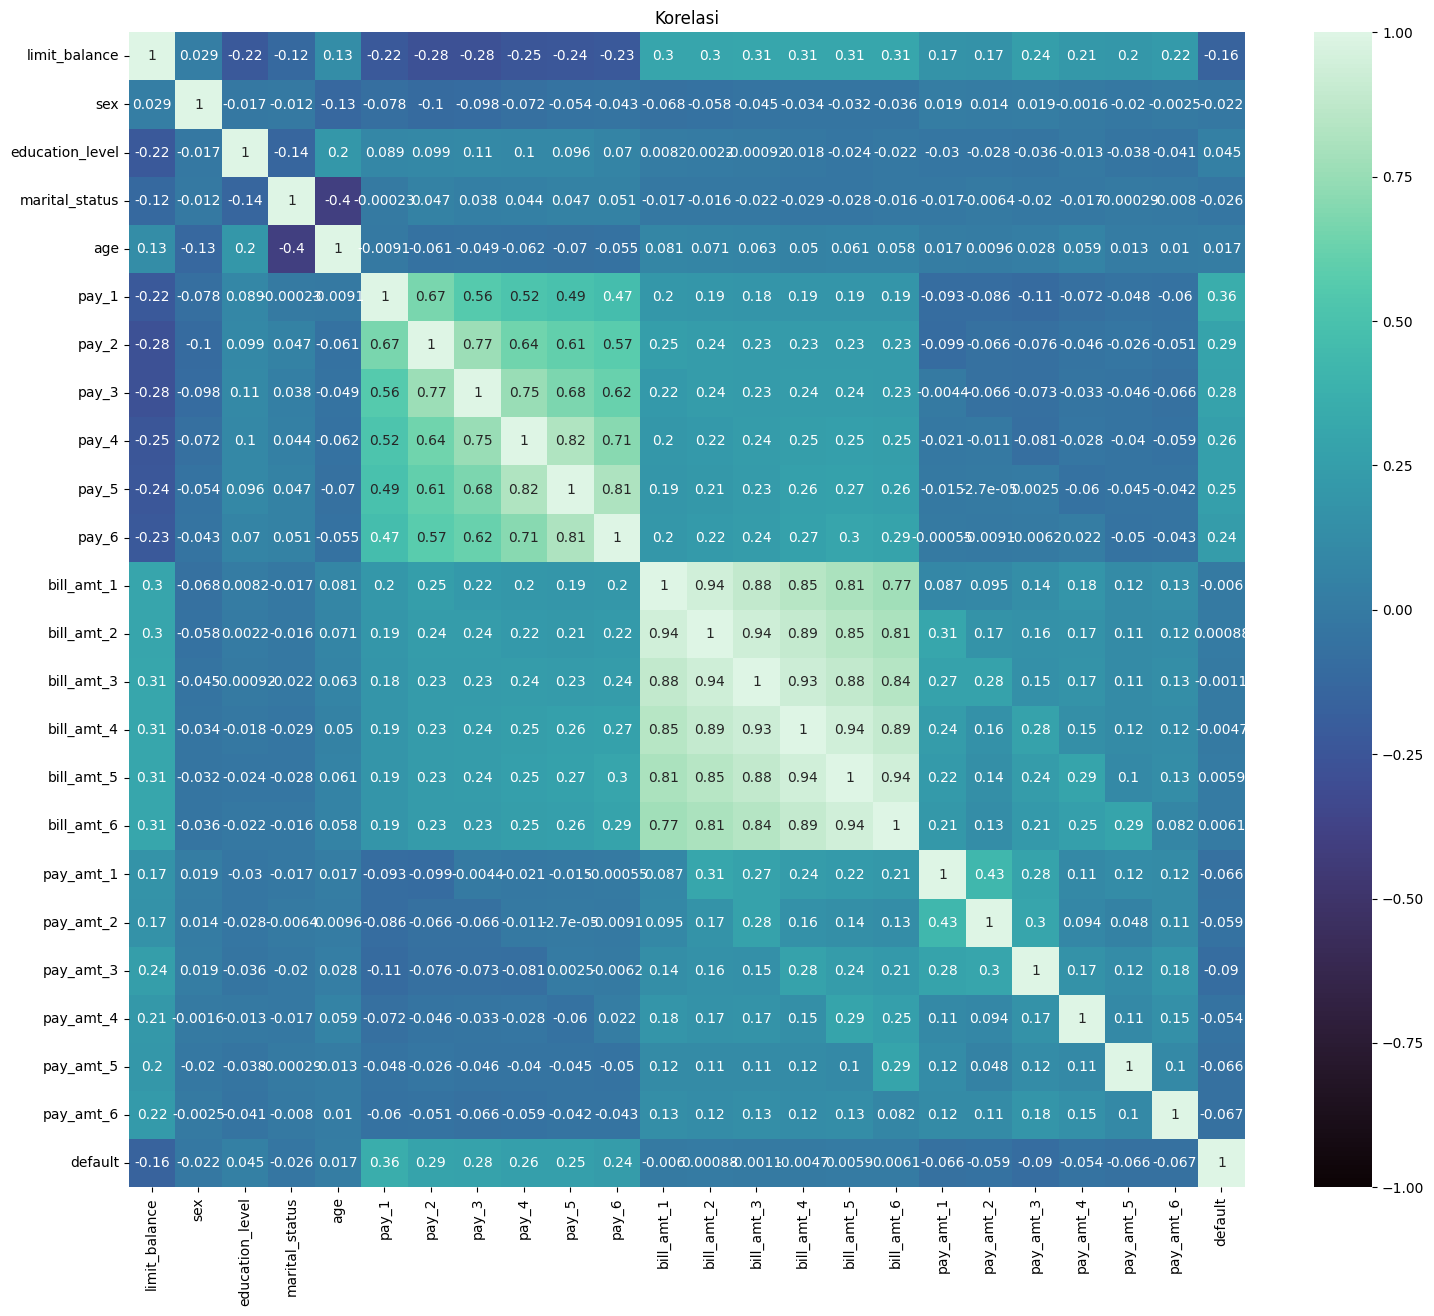

In [24]:
#tampilkan korelasi dataset

corr= df.corr()
#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Korelasi')
plt.show()

Observasi:
- Terlihat bahwa usia (age),  level pendidikan (education_level) memiliki korelasi positif dengan default_payment_next_month
- sementara itu, jenis kelamin (sex), status pernikahan(marital_status) dan limit_balance berkorelasi negatif dengan default_payment_next_month

### Cek cardinality

In [25]:
# Cardinality Check

print('Jumlah Kolom dan baris: ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())

Jumlah Kolom dan baris:  (2965, 24)

Col :  limit_balance
Length Unique Value :  59
Col :  sex
Length Unique Value :  2
Col :  education_level
Length Unique Value :  7
Col :  marital_status
Length Unique Value :  4
Col :  age
Length Unique Value :  49
Col :  pay_1
Length Unique Value :  11
Col :  pay_2
Length Unique Value :  10
Col :  pay_3
Length Unique Value :  9
Col :  pay_4
Length Unique Value :  10
Col :  pay_5
Length Unique Value :  9
Col :  pay_6
Length Unique Value :  8
Col :  bill_amt_1
Length Unique Value :  2643
Col :  bill_amt_2
Length Unique Value :  2592
Col :  bill_amt_3
Length Unique Value :  2549
Col :  bill_amt_4
Length Unique Value :  2504
Col :  bill_amt_5
Length Unique Value :  2482
Col :  bill_amt_6
Length Unique Value :  2461
Col :  pay_amt_1
Length Unique Value :  1415
Col :  pay_amt_2
Length Unique Value :  1372
Col :  pay_amt_3
Length Unique Value :  1302
Col :  pay_amt_4
Length Unique Value :  1214
Col :  pay_amt_5
Length Unique Value :  1194
Col :  pay_amt_6

Observasi:
- Kardinaliti tertinggi berada pada fitur-fitur berikut:
  - limit_balance
  - age
  - pay_(1,2,3,4,5,6),
  - bil_amt_(1,2,3,4,5,6),
  - pay_amt_(1,2,3,4,5,6)

## Visualisasi

#### default_payment_next_month

Menampilkan data default terhadap client(jumlah data) dengan No(0) dan Yes(1)

In [26]:
#panggil df
df=df2.copy()

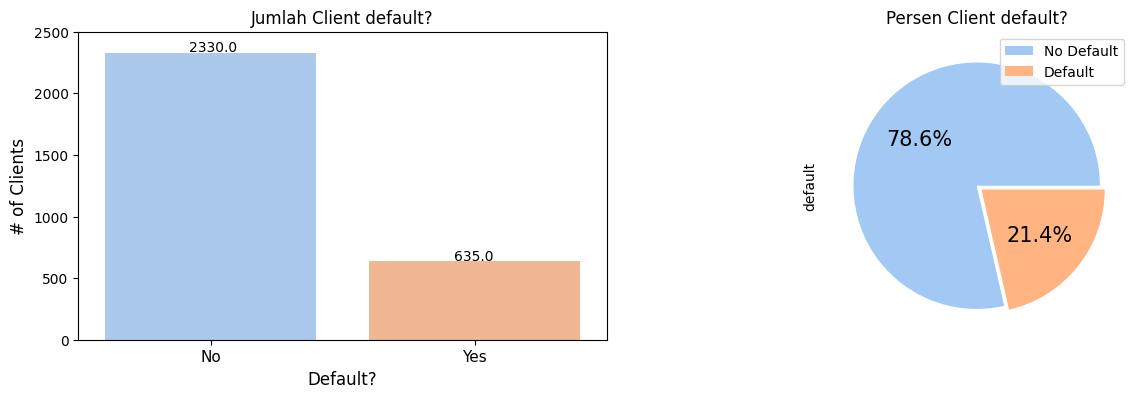

In [27]:
#Visualisasikan default/tidak default
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title("Jumlah Client default?", fontsize=12)
ax = sns.countplot(x="default", data=df, palette="pastel")
plt.xlabel("Default?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,2500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+10))

plt.subplot(1,2,2)
plt.title("Persen Client default?", fontsize=12)
df['default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = sns.color_palette('pastel')[0:5], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['No Default', 'Default'])

plt.show()


Observasi:
- Kartu kredit yang tidak ditutup (tidak default) sebanyak 2329 client (78.6%)
- Kartu kredit yang akan ditutup (default) bulan depan sebanyak 635 client (21.4%)
* hal ini berarti peninjauan hanya perlu dilakukan pada skala kecil saja, karena hanya 20% yang melakukan default

#### Fitur Demografik

##### Sex terhadap dafault

In [28]:
#jenis kelamin(sex 2: female, 1: male)
df['sex'].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

In [29]:
# Jumlah yang default/tidak default terhadap jenis kelamin(sex 2: female, 1: male)
def_sex=df['default'].groupby(df['sex']).value_counts(normalize = True)

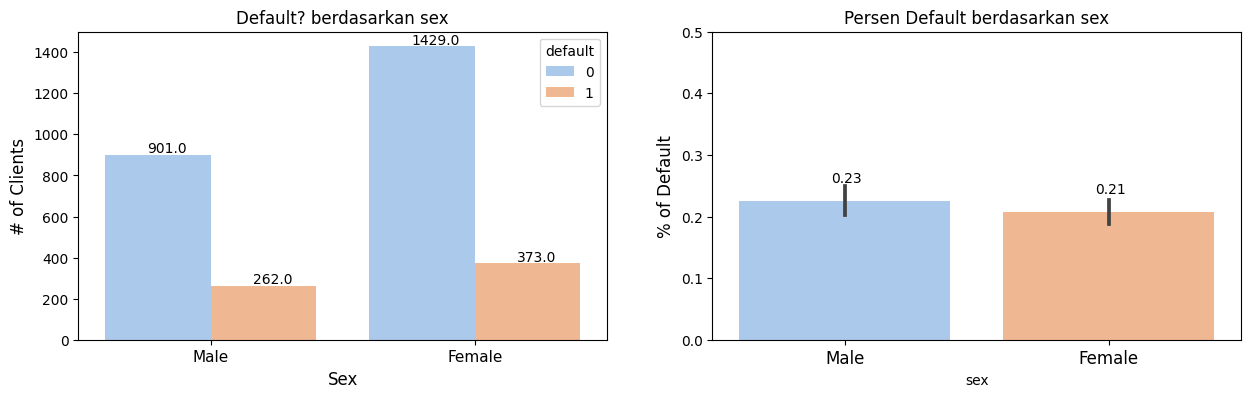

In [30]:
#visualisasikan data (default 0: No, 1 : Yes)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Default? berdasarkan sex", fontsize=12)
ax = sns.countplot(data = df, x = 'sex', hue="default", palette = 'pastel')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+10))


plt.subplot(1,2,2)
plt.title("Persen Default berdasarkan sex", fontsize=12)
ax = sns.barplot(x = "sex", y = "default", data = df, palette = 'pastel')
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=10)

plt.show()

Observasi:
- Jumlah client yang mengalami default pada male lebih tinggi dibandingkan female.
- sebanyak 262 male client (23%) dan sebanyak 373 female {21%) akan mengalami default bulan depan

##### education_level

Berdasarkan deskriptif statistik (df.describe), terdapat nilai minimum 0 pada `education_level` yang tidak masuk akal pada feature encoding berdasarkan data. Nilai (0,4,5,6) akan diubah menjadi kategori `others`

In [31]:
# education_level (1: grad school, 2: university, 3: high school, 4: others, 5: unknown, 6: unknown, 0: unknown)
#Tampilkan jumlah dari masing-masing level edukasi
df['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [32]:
# persentase education_level
df['default'].groupby(df['education_level']).value_counts(normalize=True)

education_level  default
0                0          1.000000
1                0          0.829644
                 1          0.170356
2                0          0.755714
                 1          0.244286
3                0          0.766046
                 1          0.233954
4                0          1.000000
5                0          0.958333
                 1          0.041667
6                0          0.500000
                 1          0.500000
Name: default, dtype: float64

Observasi:
- karena (0, 5, 6) persentase default yang kecil, maka akan digabungkan menjadi `others`

In [33]:
#ubah nilai 0 menjadi 5
df.loc[:, 'education_level']= df.loc[:,'education_level'].replace(0,5)
#ubah nilai 6 menjadi 5
df.loc[:, 'education_level']= df.loc[:,'education_level'].replace(6,5)

In [34]:
# education_level (1: grad school, 2: university, 3: high school, 4: others, 5: unknown
df['education_level'].value_counts()

2    1400
1    1039
3     483
5      30
4      13
Name: education_level, dtype: int64

In [35]:
df['default'].groupby(df['education_level']).value_counts(normalize = True)

education_level  default
1                0          0.829644
                 1          0.170356
2                0          0.755714
                 1          0.244286
3                0          0.766046
                 1          0.233954
4                0          1.000000
5                0          0.900000
                 1          0.100000
Name: default, dtype: float64

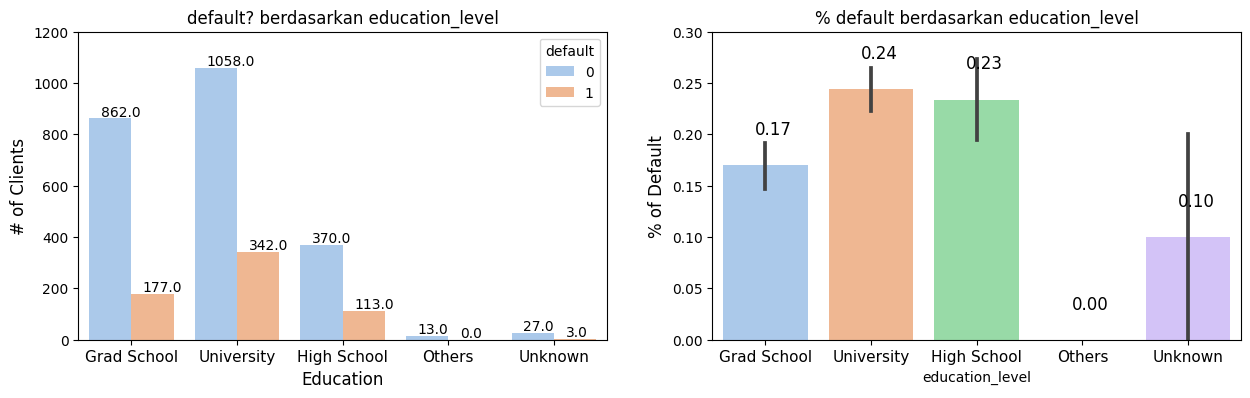

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title("default? berdasarkan education_level", fontsize=12)
ax = sns.countplot(data = df, x = 'education_level', hue="default", palette = 'pastel')
plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1200)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+10))


plt.subplot(1,2,2)
plt.title("% default berdasarkan education_level", fontsize=12)
ax = sns.barplot(x = "education_level", y = "default", data = df, palette = 'pastel')
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.3)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=12)

plt.show()

Observasi:
- Kemungkinan akan default didominasi oleh univeristy dan high school. Sementara Grad school dan others cukup kecil

- Semakin tinggi tingkat pendidikan seseorang, semakin rendah kemungkinan orang tersebut untuk default.

##### marital_status

In [37]:
#marital status (1: married, 2: single, 3: divorced, 0:others)
df['marital_status']. value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

In [38]:
#tampilkan persentasenya terhadap default
df['default'].groupby(df['marital_status']).value_counts(normalize = True)

marital_status  default
0               0          1.000000
1               0          0.773273
                1          0.226727
2               0          0.794856
                1          0.205144
3               0          0.828571
                1          0.171429
Name: default, dtype: float64

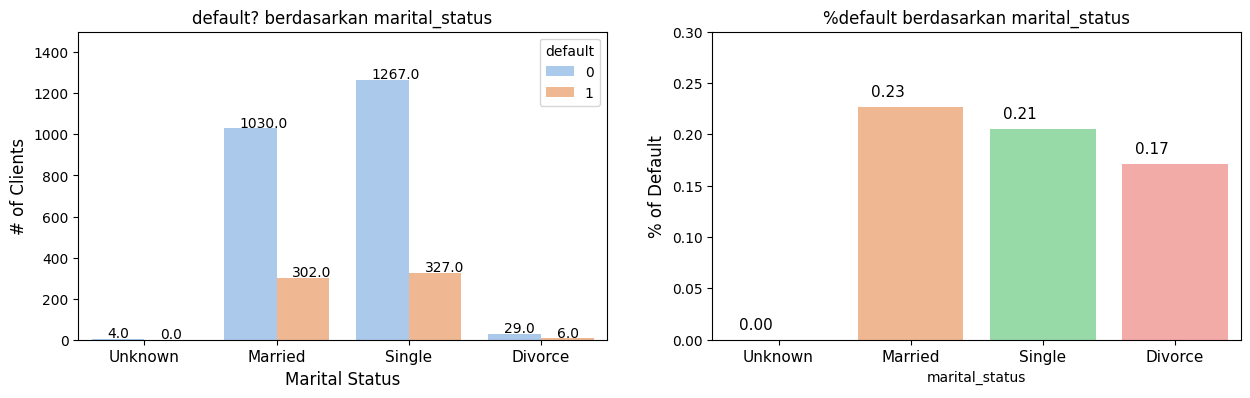

In [39]:
plt.figure(figsize=(15,4))


plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'marital_status', hue="default", palette = 'pastel')
plt.title("default? berdasarkan marital_status", fontsize=12)
plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+5))


plt.subplot(1,2,2)
ax = sns.barplot(x = "marital_status", y = "default", data = df, palette = 'pastel', errorbar= None)
plt.title("%default berdasarkan marital_status", fontsize=12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.3)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01),fontsize=11)

plt.show()

Observasi:
- Kategori marital_status yang paling mungkin default adalah orang yang sudah menikah (married)
- sementara yang paling rendah untuk default adalah orang yang sudah bercerai (divorced)

##### Umur (age)

<Figure size 1200x400 with 0 Axes>

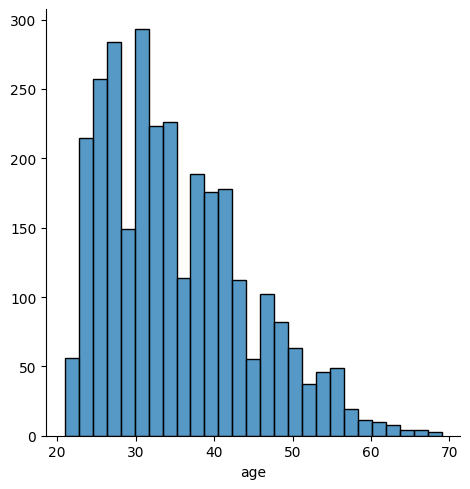

In [40]:
#Tampilkan distribusi age
plt.figure(figsize=(12,4))

sns.displot(df['age'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

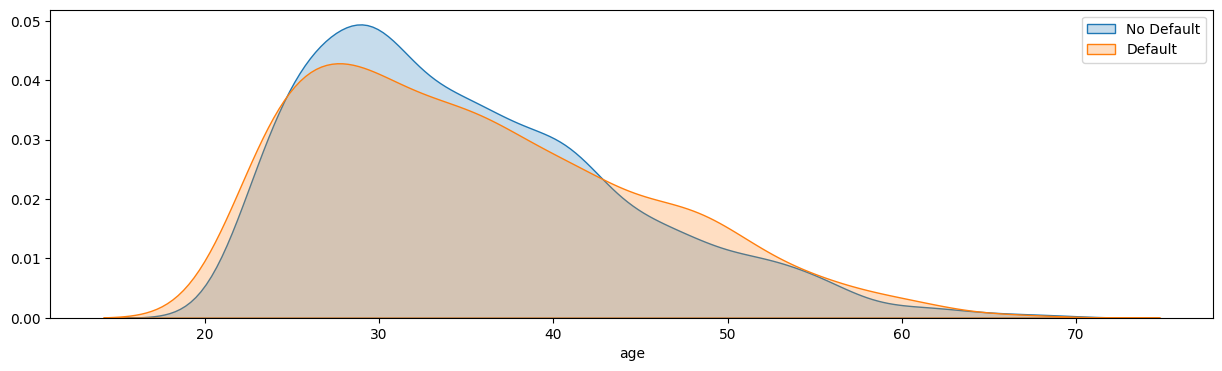

In [41]:
plt.figure(figsize=(15,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'age'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'age'], label = 'Default', fill = True)
plt.ylabel('')
plt.legend()
plt.show()

Observasi:
- terlihat bahwa dataset ini didominasi oleh client berusia 25 hingga 40 tahun.
- Dan terlihat bahwa pada umur-umur tersebut kemungkinan default cukup rendah
- berdasarkan hal tersebut, maka perlu dibuat range untuk masing-masing group umur

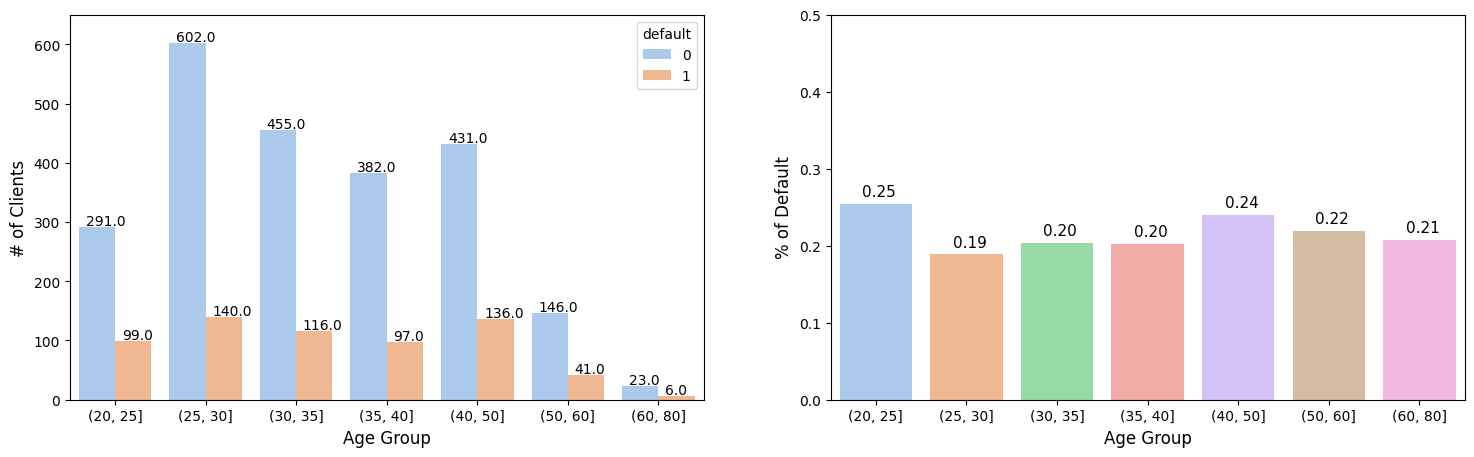

In [42]:
#plot umur
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
#membuat group umur
df['AgeBin'] = pd.cut(df['age'],[20, 25, 30, 35, 40, 50, 60, 80])

#group umur terhadap default
df['default'].groupby(df['AgeBin']).value_counts(normalize = True)

#tampilkan data default terhadap agegroup
df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
ax = sns.countplot(data = df, x = 'AgeBin', hue="default", palette = 'pastel', order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,650)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+3))

plt.subplot(1,2,2)
#tampilkan persentase default terhadap agegroup
ax = sns.barplot(x = "AgeBin", y = "default", data = df, palette = 'pastel', errorbar = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),fontsize=11)


plt.show()

Observasi:
- Yang paling mungkin melakukan default adalah usia 20-25 tahun dan 40-50 tahun
- sementara kemungkinan paling rendah client melakukan default pada umur 30-35 tahun

##### Default terhadap Fitur Demografik



---


**Keterangan**

- **sex:** 1: male, 2: female
- **education_level:** 1: grad school, 2: university, 3: high school, 4: others, 5: unknown

- **marital status:** (1: married, 2: single, 3: divorced, 0:others)

**Notes yang paling mungkin default:**
1. Laki-Laki (male: 1)
2. Tingkat pendidikan (2:university)
3. orang yang sudah menikah (1: married)

Apakah jika ditinjau secara keseluruhan, kesimpulan diatas masih tetap sama?


---



##### default terhadap sex/marital_status

In [43]:
#group data-data tersebut terhadap default
df.groupby(by=['marital_status', 'sex'])['default'].value_counts(normalize = True)

marital_status  sex  default
0               1    0          1.000000
                2    0          1.000000
1               1    0          0.770428
                     1          0.229572
                2    0          0.775061
                     1          0.224939
2               1    0          0.781102
                     1          0.218898
                2    0          0.803962
                     1          0.196038
3               1    0          0.615385
                     1          0.384615
                2    0          0.954545
                     1          0.045455
Name: default, dtype: float64

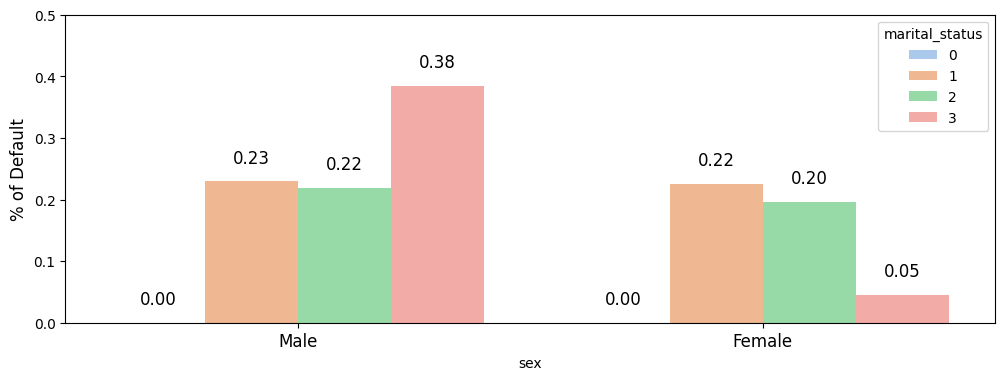

In [44]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "sex", y = "default", hue = "marital_status", data = df, palette = 'pastel', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

Observasi:
- Laki-laki (male) dominan untuk default diseluruh aspek marital_status. Yang tertinggi adalah male yang divorced

- sementara perempuan (female) semua persentase defaultnya cukup rendah diseluruh aspek marital status. Yang tertinggi adalah female yang single.

##### default terhadap sex/education_level

In [45]:
df.groupby(by=['education_level', 'sex'])['default'].value_counts(normalize = True)

education_level  sex  default
1                1    0          0.828431
                      1          0.171569
                 2    0          0.830428
                      1          0.169572
2                1    0          0.734317
                      1          0.265683
                 2    0          0.769231
                      1          0.230769
3                1    0          0.748663
                      1          0.251337
                 2    0          0.777027
                      1          0.222973
4                1    0          1.000000
                 2    0          1.000000
5                1    0          0.950000
                      1          0.050000
                 2    0          0.800000
                      1          0.200000
Name: default, dtype: float64

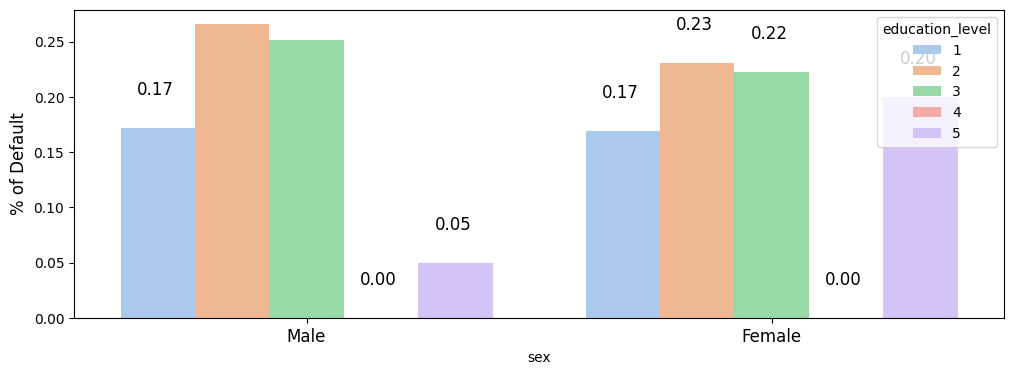

In [46]:
#Tampilkan visualisasinya
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "sex", y = "default", hue = "education_level", data = df, palette = 'pastel', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
#plt.ylim(0,1)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

Observasi:
- Laki-laki (male) dominan untuk default diseluruh aspek education_level. Yang tertinggi adalah male dengan tingkat pendidikan university

- sementara perempuan (female) semua persentase defaultnya cukup rendah diseluruh aspek marital status kecuali others. Yang tertinggi adalah female dengan tingkat pendidikan university.

#### limit_balance (Jumlah pemberian kredit)

<ipython-input-47-63d1270c7689>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['limit_balance'])


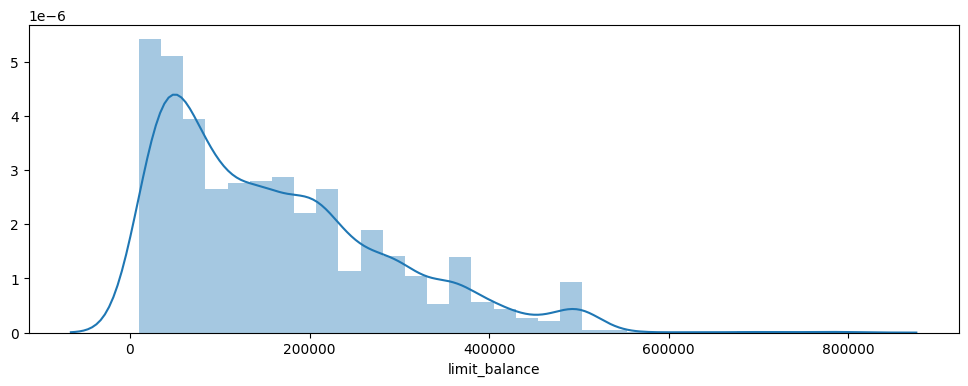

In [47]:
plt.figure(figsize=(12,4))

sns.distplot(df['limit_balance'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

10000.0
800000.0


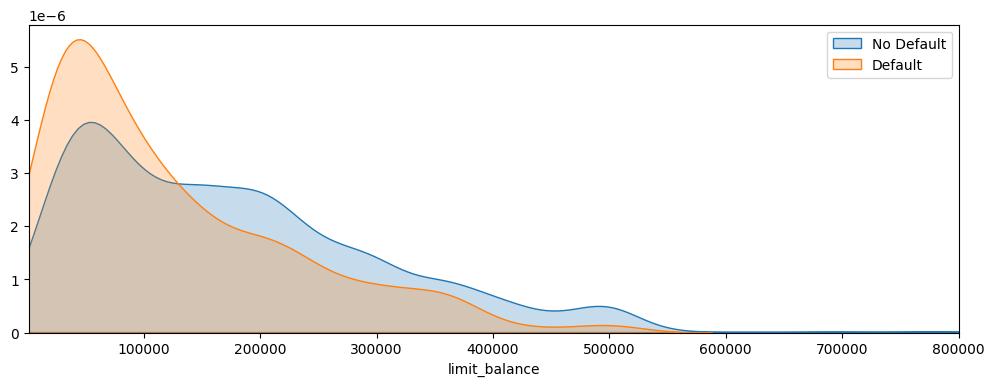

In [48]:
print(min(df['limit_balance']))
print(max(df['limit_balance']))

plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['default'] == 0), 'limit_balance'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'limit_balance'], label = 'Default', fill = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.xlim(1000, 800000)
plt.legend()
plt.show()

Observasi:
- kebanyakan client memiliki batas pengeluaran (limit_balance)yang kurang dari 200k
- dan kemungkinan default terbesar berada pada limit_balance < 200k

Oleh karena itu, perlu dilakukan range untuk limit_balance

##### Limit Balance

In [49]:
df=df2.copy()

In [50]:
#Buat range untuk limit_balance
df['limitbin'] = pd.cut(df['limit_balance'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['limitbin'].value_counts())

(5000, 50000]        771
(200000, 300000]     522
(50000, 100000]      483
(100000, 150000]     408
(150000, 200000]     373
(300000, 400000]     258
(400000, 500000]     136
(500000, 1100000]     14
Name: limitbin, dtype: int64


In [51]:
#persentase limitbin terhadap default
df['default'].groupby(df['limit_balance']).value_counts(normalize = True)

limit_balance  default
10000.0        0          0.543478
               1          0.456522
20000.0        0          0.674877
               1          0.325123
30000.0        0          0.614865
                            ...   
680000.0       0          1.000000
700000.0       0          1.000000
750000.0       0          1.000000
780000.0       0          1.000000
800000.0       0          1.000000
Name: default, Length: 102, dtype: float64

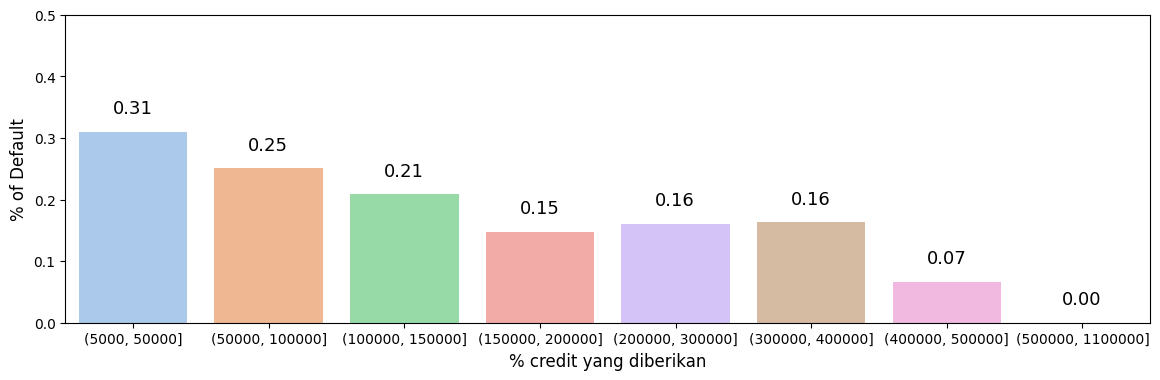

In [52]:
plt.figure(figsize=(14,4))

df['limitbin'] = df['limitbin'].astype('str')
limitbin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(x = "limitbin", y = "default", data = df, palette = 'pastel', errorbar = None, order = limitbin_order)

plt.xlabel("% credit yang diberikan", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Observasi:
- kemungkinan default terbesar berasal dari client yang diberikan limit_balance sebesar < 50K, dengan 31% client akan default
- semakin besar limit_balance client, semakin kecil kemungkinan untuk default

##### limit balance terhadap Fitur Demografik

Mean limit balance &  sex
1    158925.193465
2    166237.513873
Name: limit_balance, dtype: float64
Mean limit balance & education_level
0    175000.000000
1    206025.024062
2    144964.285714
3    124409.937888
4    227692.307692
5    155416.666667
6     62500.000000
Name: limit_balance, dtype: float64
Mean limit balance & marital_status
0    115000.000000
1    179534.534535
2    151035.131744
3    115428.571429
Name: limit_balance, dtype: float64
Mean limit balance & AgeBin
(20, 25]     70410.256410
(25, 30]    164407.008086
(30, 35]    194028.021016
(35, 40]    193382.045929
(40, 50]    171111.111111
(50, 60]    155882.352941
(60, 80]    184482.758621
Name: limit_balance, dtype: float64


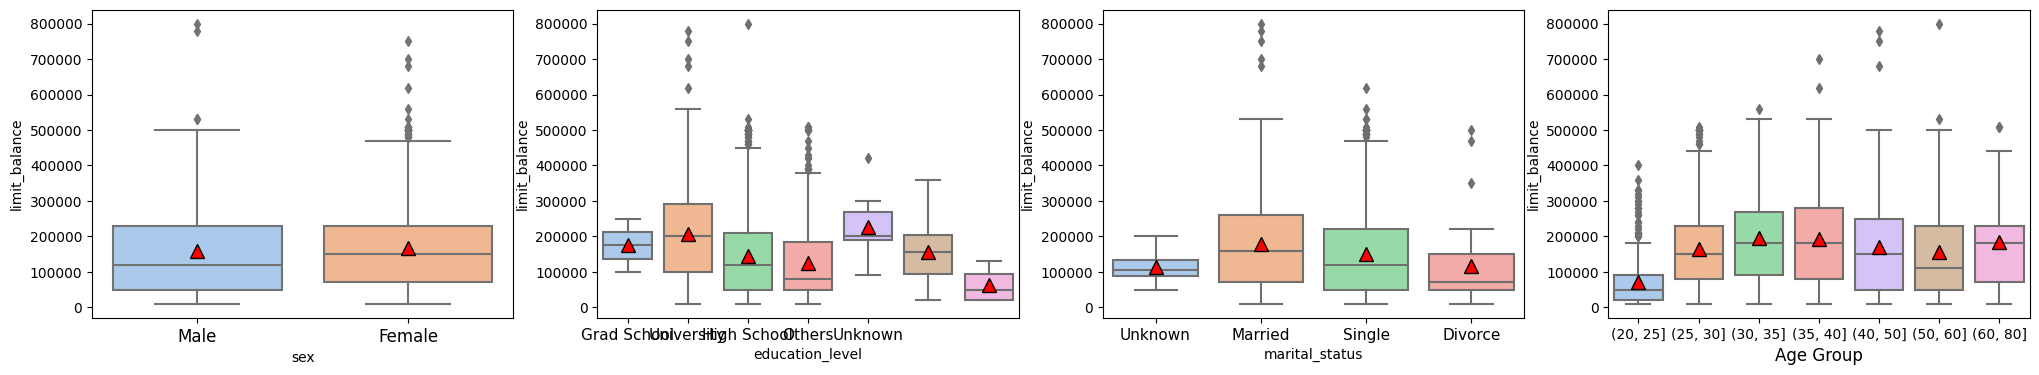

In [53]:
#Visualisasikan limit balance terhadap fitur demografik
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
print('Mean limit balance & ', df.groupby('sex')['limit_balance'].mean())
sns.boxplot(x = "sex", y = "limit_balance",data = df, palette = 'pastel', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)


plt.subplot(1,4,2)
print('Mean limit balance &', df.groupby('education_level')['limit_balance'].mean())
sns.boxplot(x = "education_level", y = "limit_balance", data = df, palette = 'pastel', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)


plt.subplot(1,4,3)
print('Mean limit balance &', df.groupby('marital_status')['limit_balance'].mean())
sns.boxplot(x = "marital_status", y = "limit_balance", data = df, palette = 'pastel', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.subplot(1,4,4)
#membuat group umur
df['AgeBin'] = pd.cut(df['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print('Mean limit balance &', df.groupby('AgeBin')['limit_balance'].mean())

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
sns.boxplot(x = "AgeBin", y = "limit_balance",data = df, palette = 'pastel', order = AgeBin_order, showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xlabel("Age Group", fontsize= 12)
plt.show()

***Observasi Keseluruhan:***

Berdasarkan data tersebut, dapat disimpulkan bahwa  rata-rata limit balance paling tinggi diberikan pada:
- perempuan (female)
- education level: others
- marital_status : married
- age group: (30,40] tahun

Mean  education_level  sex
0                1      175000.000000
1                1      215857.843137
                 2      199667.194929
2                1      130996.309963
                 2      153787.878788
3                1      115882.352941
                 2      129797.297297
4                1      205000.000000
                 2      247142.857143
5                1      152000.000000
                 2      161111.111111
6                1       76666.666667
                 2       20000.000000
Name: limit_balance, dtype: float64
Mean  marital_status  sex
0               1       50000.000000
                2      136666.666667
1               1      180680.933852
                2      178814.180929
2               1      142708.661417
                2      156548.488008
3               1       99230.769231
                2      125000.000000
Name: limit_balance, dtype: float64
Mean  AgeBin    sex
(20, 25]  1       54642.857143
          2       76762.589928
(25

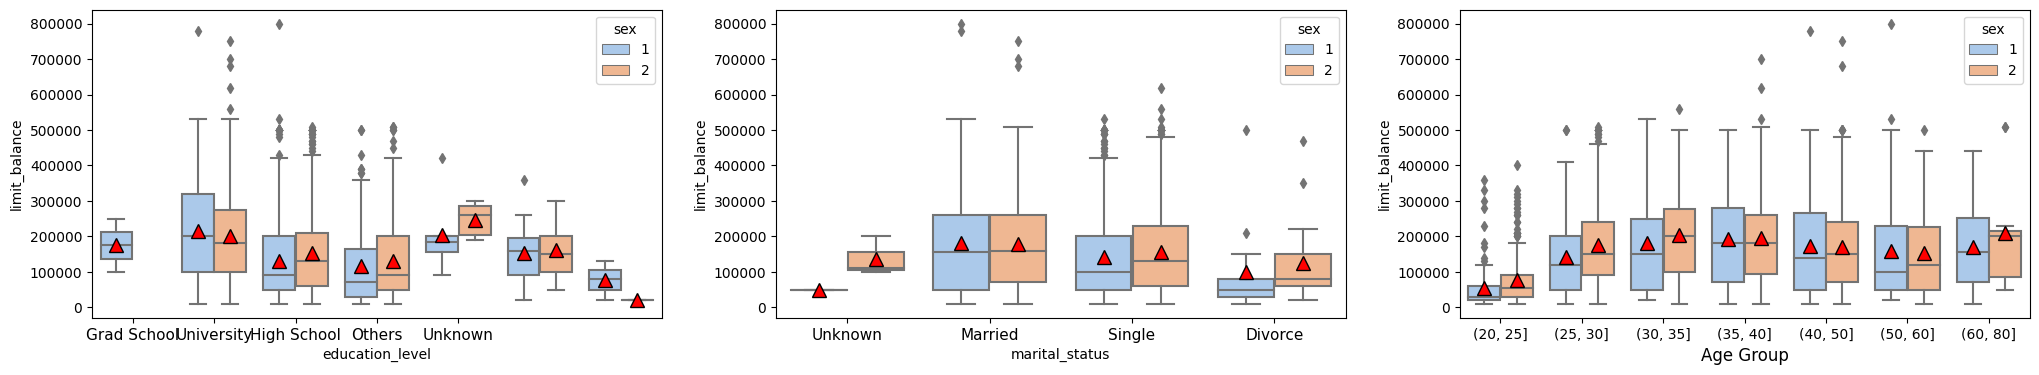

In [54]:
#Visualisasikan limit balance terhadap fitur demografik
print('Mean ',df.groupby(by=['education_level', 'sex'])['limit_balance'].mean())
print('Mean ',df.groupby(by=['marital_status', 'sex'])['limit_balance'].mean())
print('Mean ', df.groupby(by=['AgeBin', 'sex'])['limit_balance'].mean())

plt.figure(figsize=(25,4))

plt.subplot(1,3,1)
sns.boxplot(x = "education_level", y = "limit_balance", hue = 'sex', data = df, palette = 'pastel', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)


plt.subplot(1,3,2)
sns.boxplot(x = "marital_status", y = "limit_balance", hue = 'sex', data = df, palette = 'pastel', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.subplot(1,3,3)
sns.boxplot(x = "AgeBin", y = "limit_balance", hue = 'sex', data = df, palette = 'pastel', order = AgeBin_order, showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xlabel("Age Group", fontsize= 12)

plt.show()

Observasi:
- semua pemberian rata-rata limit balance didominasi oleh perempuan (female) kecuali pada male Grad school, male married dan male berumur 40-50

#### Repayment Status (PAY_X)

**PAY_X : (repayment status)**
membayar kembali uang yang telah digunakan dari kartu kredit
  - nilai negatif : deadline pembayaran bayar dalam bulan
  - nilai positif : terlambat melakukan pembayaran dalam bulan

***Repayment status***:
- PAY_1: Repayment status di September, 2005
- PAY_2: Repayment status di Agustus, 2005
* PAY_3: Repayment status di Juli, 2005

- PAY_4: Repayment status di Juni, 2005

- PAY_5: Repayment status di Mei, 2005

- PAY_6: Repayment status di April, 2005

In [55]:
df['pay_1'].unique()

array([ 0.,  2.,  1., -1., -2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [56]:
df.head(1)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default,limitbin,AgeBin
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,"(50000, 100000]","(50, 60]"


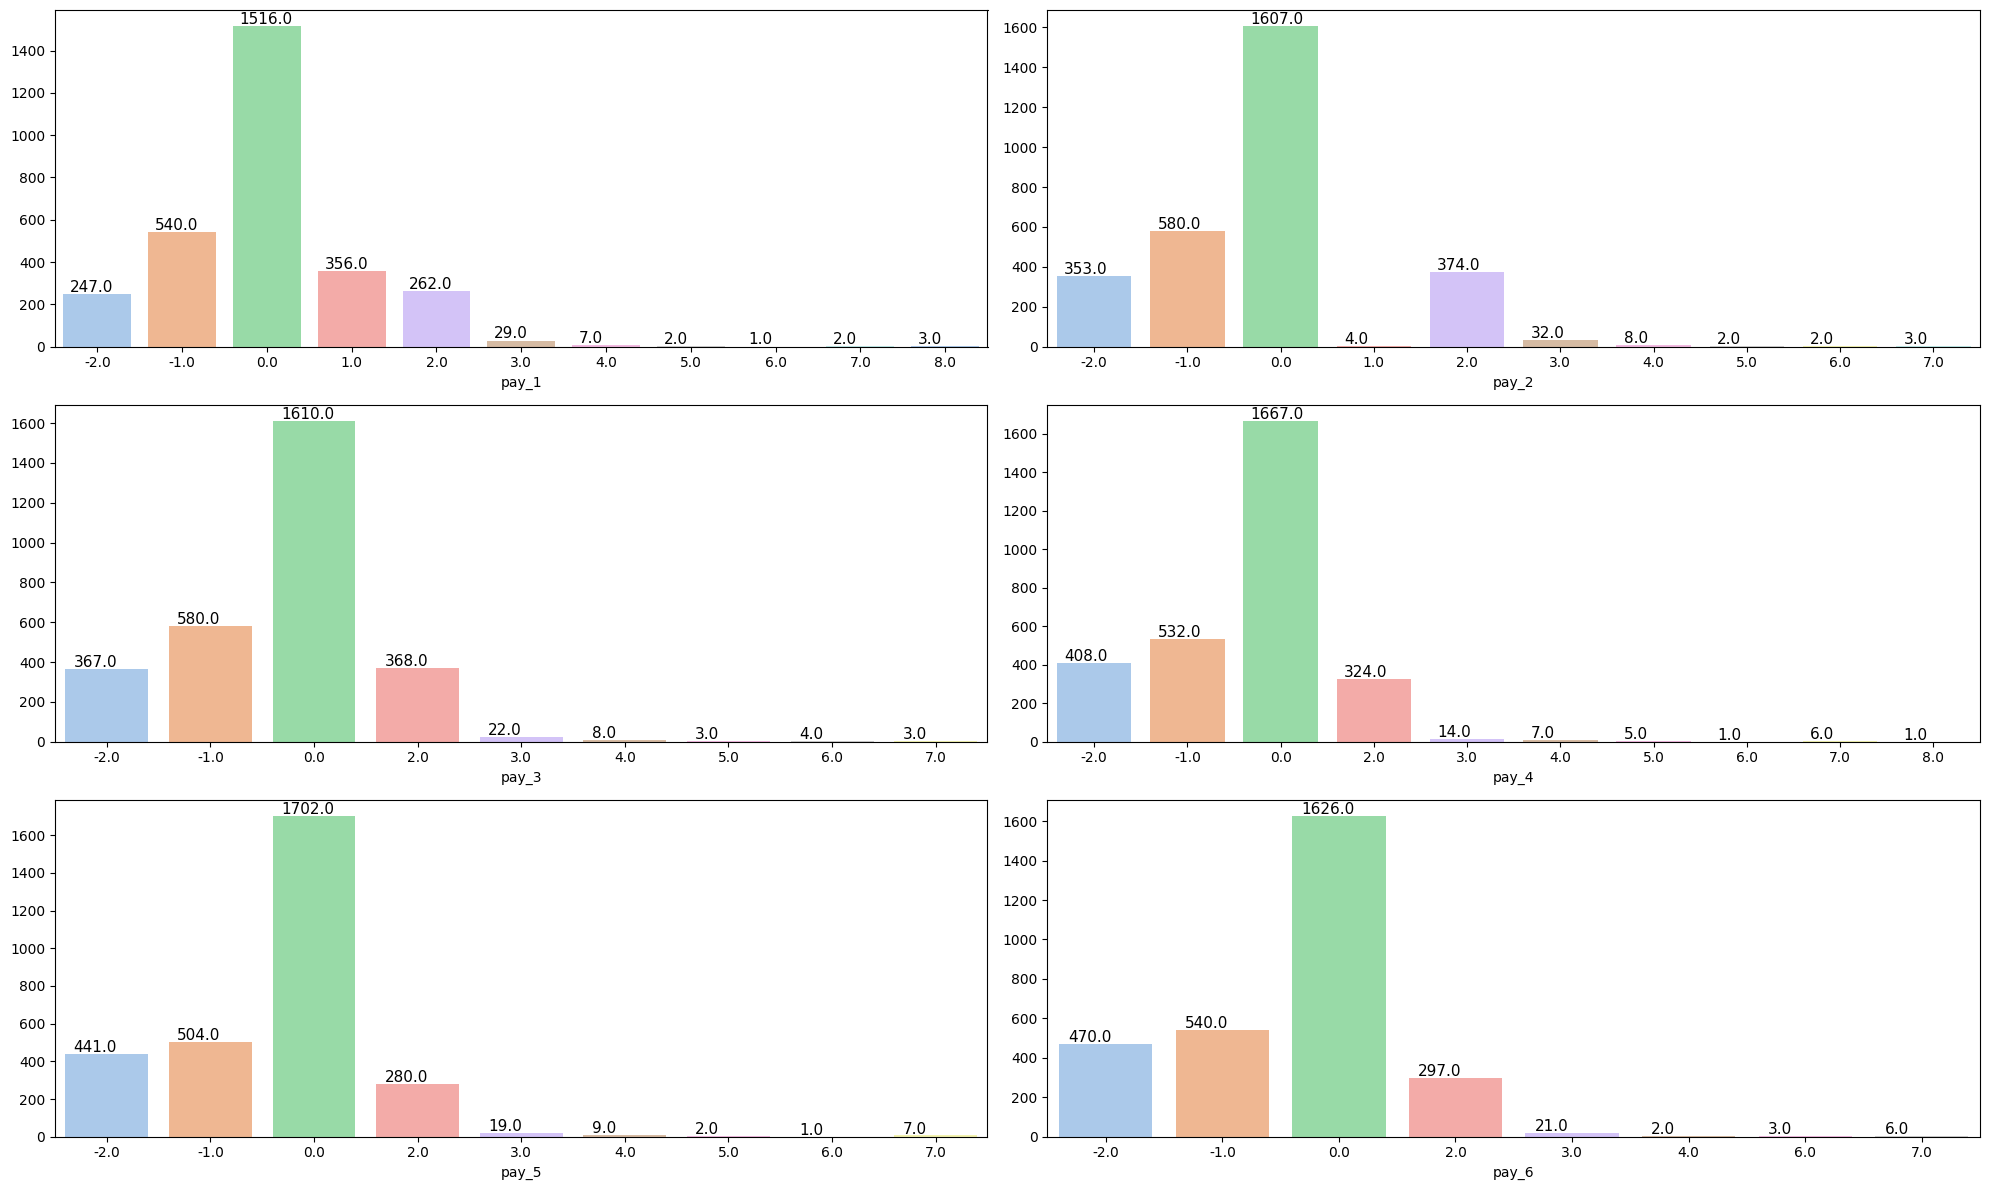

In [57]:
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(20,12))

for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(x = df.loc[:,col], palette = 'pastel')
    #plt.ylim(0,1600)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+10), fontsize = 11)

plt.show()

Observasi:
- Banyak dari client yang melakukan repayment dengan tepat waktu (0: tepat waktu) pada masing-masing bulan
- cukup banyak yang membayar sebelum deadline repayment hingga 2 bulan/1 bulan sebelumnya

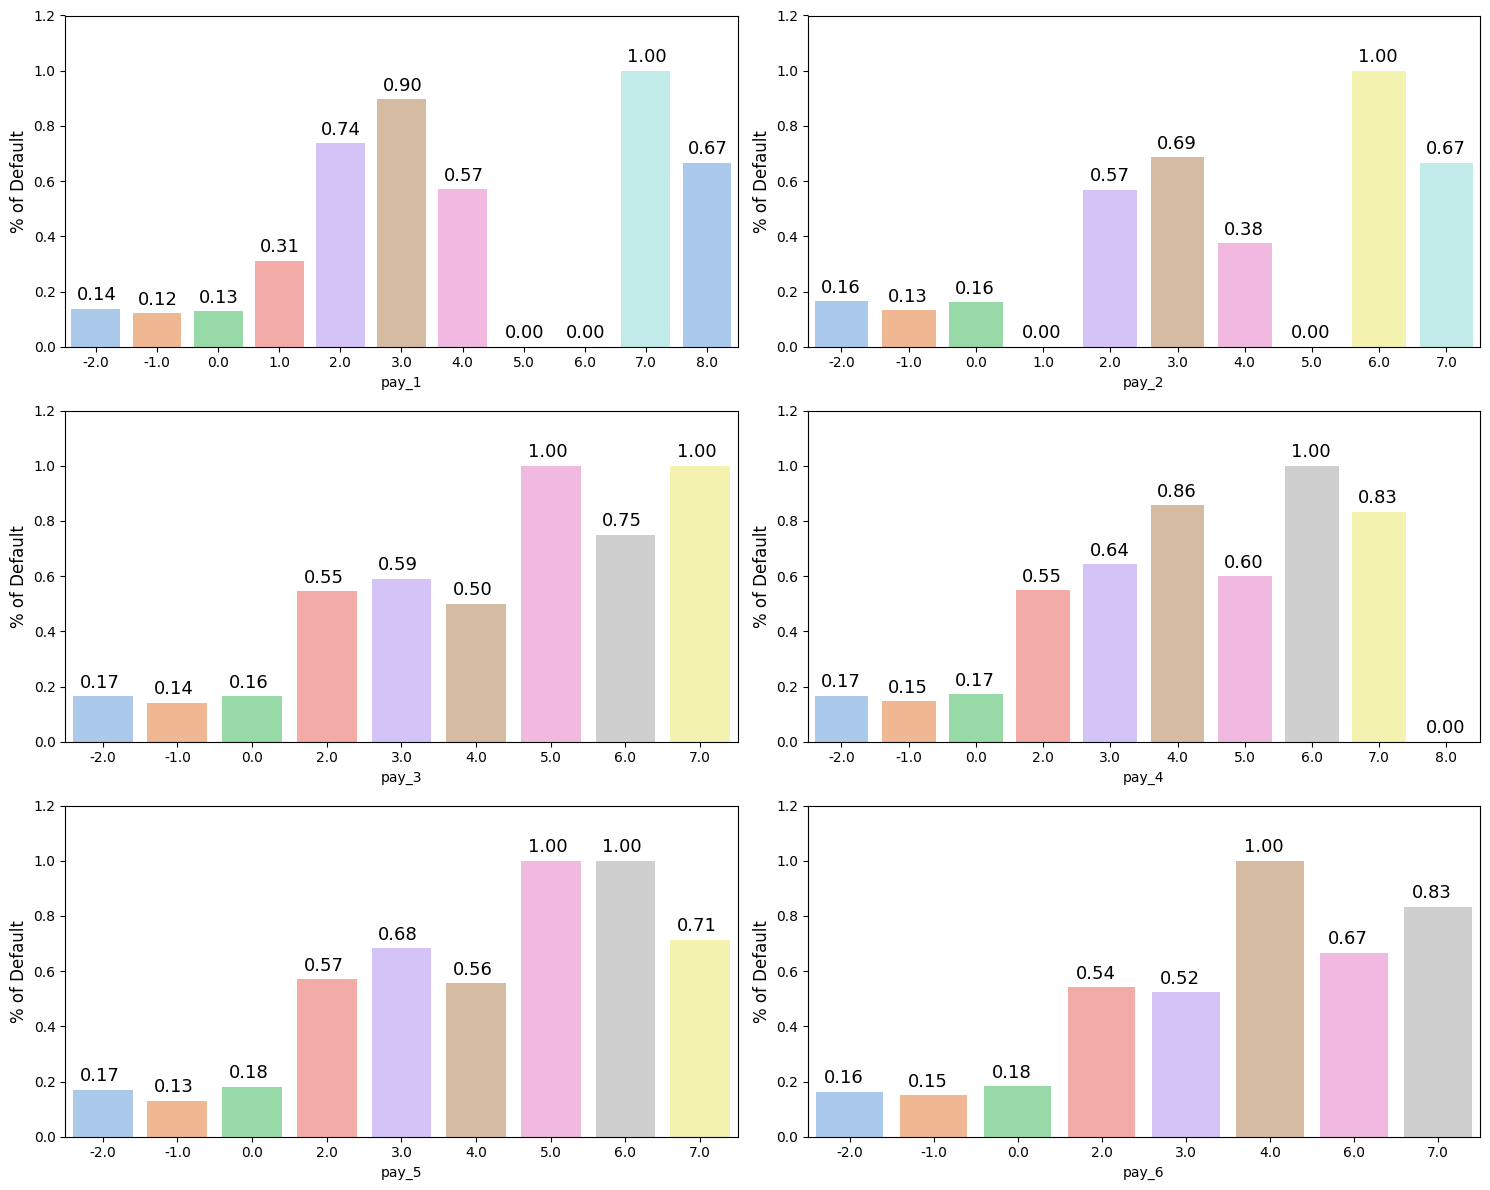

In [58]:
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'pastel', errorbar=None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Observasi:
- Client yang melakukan pembayaran tepat waktu dan sebelum dedline repayment, akan lebih kecil melakukan default

Karena banyak yang tidak bayar pada bulan ke 4+ maka, kita gabungkan saja kategorinya

In [59]:
df['pay_1_new'] = df['pay_1'].copy()
df['pay_2_new'] = df['pay_2'].copy()
df['pay_3_new'] = df['pay_3'].copy()
df['pay_4_new'] = df['pay_4'].copy()
df['pay_5_new'] = df['pay_5'].copy()
df['pay_6_new'] = df['pay_6'].copy()

In [60]:
pay_x_new = ['pay_1_new', 'pay_2_new', 'pay_3_new', 'pay_4_new', 'pay_5_new', 'pay_6_new']

for col in pay_x_new:
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

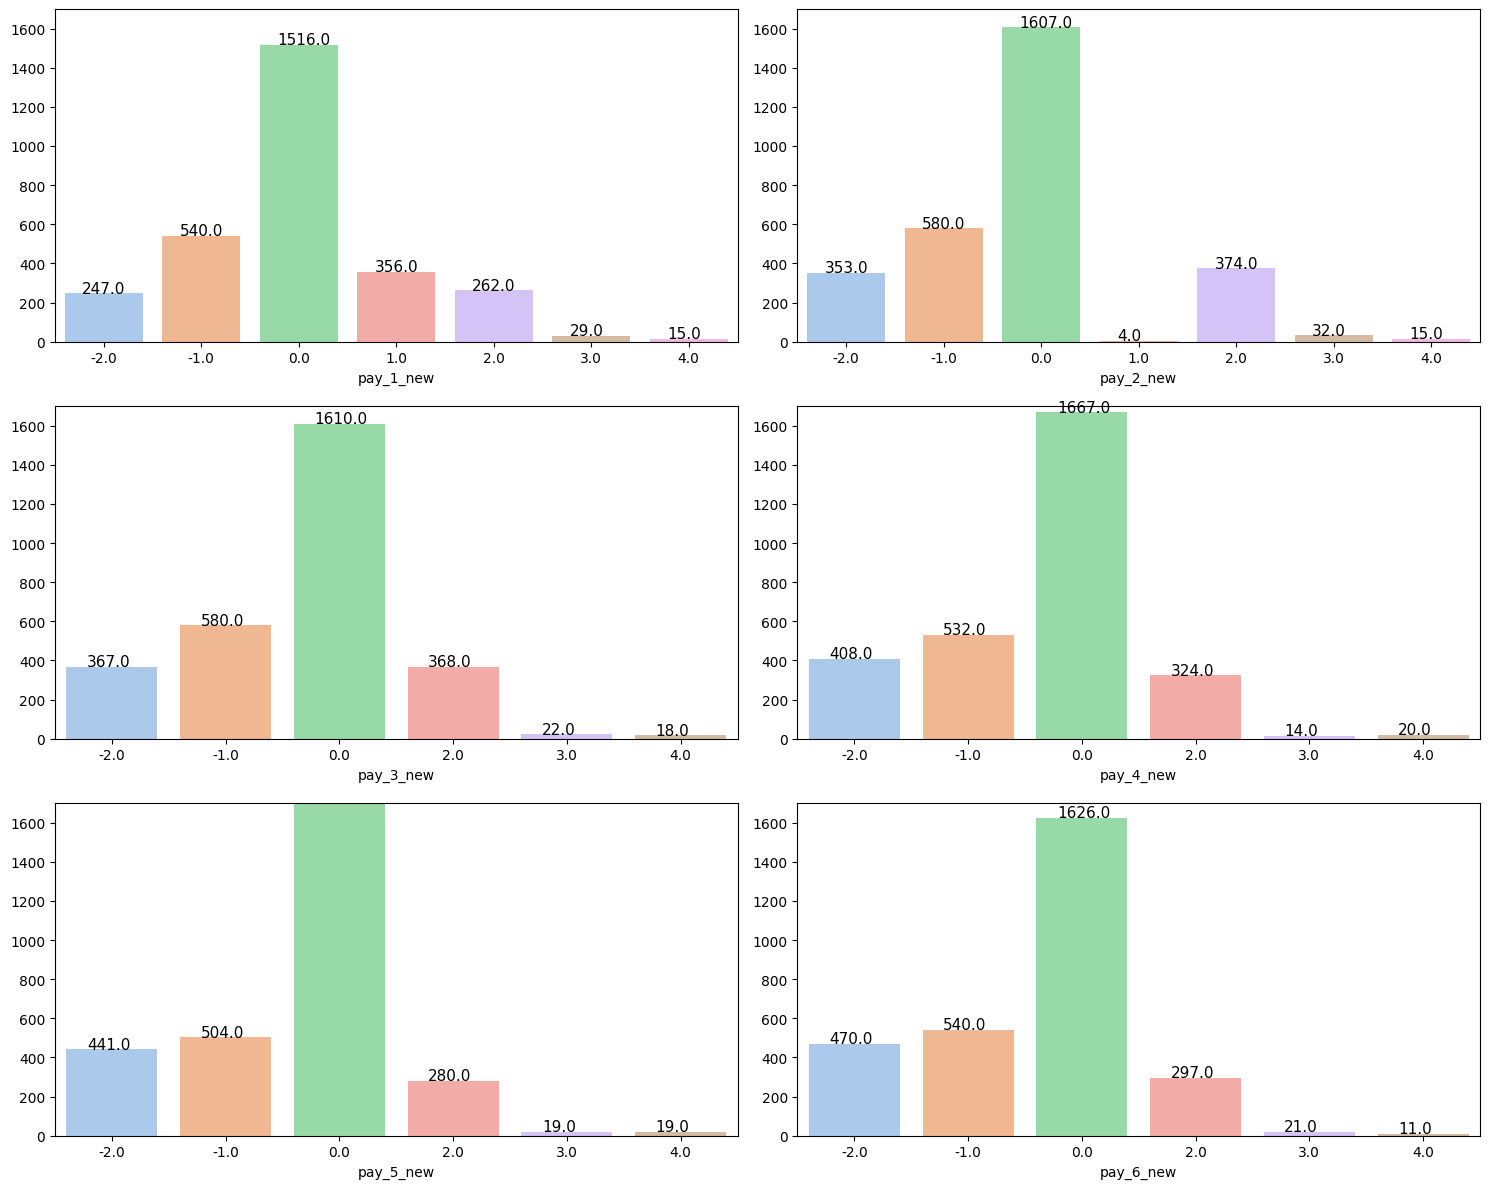

In [61]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, palette = 'pastel')
    plt.ylim(0,1700)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+3), fontsize = 11)

plt.show()

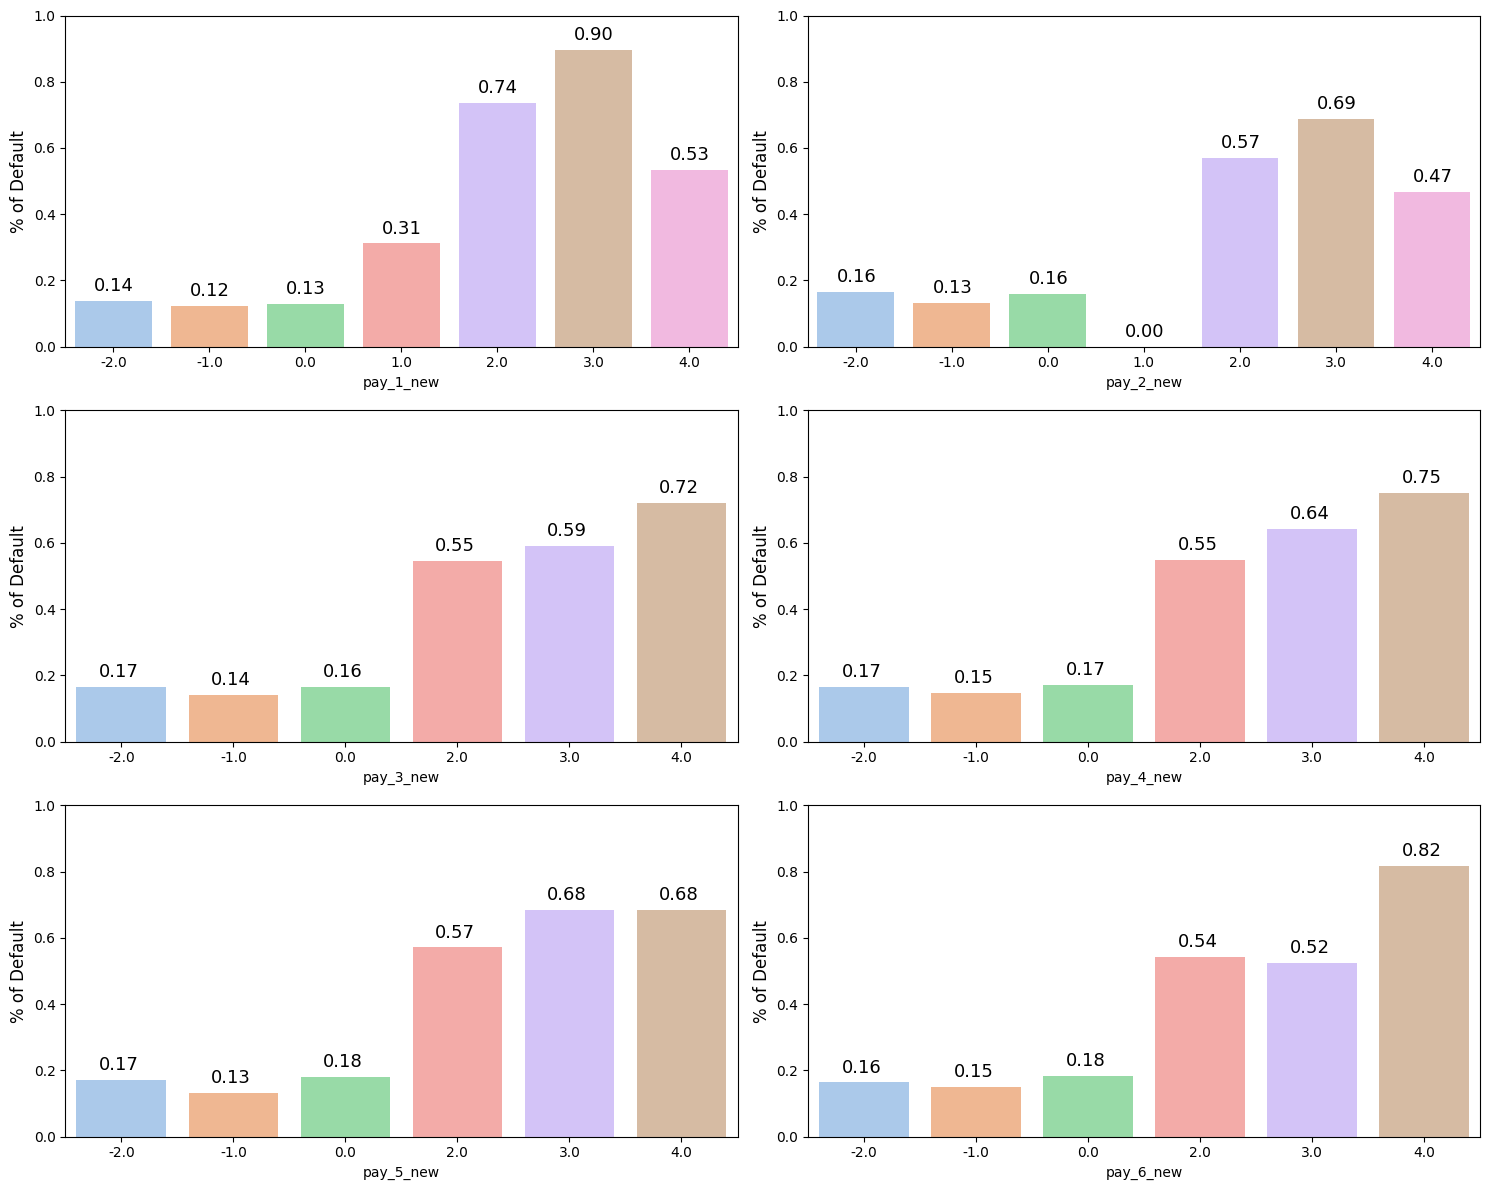

In [62]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'pastel', errorbar=None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

plt.show()

#### Default terhadap Bill Statement


In [63]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default', 'limitbin', 'AgeBin', 'pay_1_new', 'pay_2_new',
       'pay_3_new', 'pay_4_new', 'pay_5_new', 'pay_6_new'],
      dtype='object')

In [64]:
bill_amtx_fts = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

In [65]:
df['bill_amt_1_bin'] = df['bill_amt_1'].copy()
df['bill_amt_2_bin'] = df['bill_amt_2'].copy()
df['bill_amt_3_bin'] = df['bill_amt_3'].copy()
df['bill_amt_4_bin'] = df['bill_amt_4'].copy()
df['bill_amt_5_bin'] = df['bill_amt_5'].copy()
df['bill_amt_6_bin'] = df['bill_amt_6'].copy()

In [66]:
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default', 'limitbin', 'AgeBin', 'pay_1_new', 'pay_2_new',
       'pay_3_new', 'pay_4_new', 'pay_5_new', 'pay_6_new', 'bill_amt_1_bin',
       'bill_amt_2_bin', 'bill_amt_3_bin', 'bill_amt_4_bin', 'bill_amt_5_bin',
       'bill_amt_6_bin'],
      dtype='object')

In [67]:
bill_amtx_bins = ['bill_amt_1_bin','bill_amt_2_bin', 'bill_amt_3_bin', 'bill_amt_4_bin', 'bill_amt_5_bin','bill_amt_6_bin']

for i, col in enumerate (bill_amtx_bins):
    df[col] = pd.cut(df[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(df[col].value_counts())

(0, 25000]           1239
(25000, 75000]        773
(75000, 200000]       557
(-1, 0]               200
(200000, 2000000]     138
(-350000, -1]          58
Name: bill_amt_1_bin, dtype: int64
(0, 25000]           1238
(25000, 75000]        760
(75000, 200000]       535
(-1, 0]               233
(200000, 2000000]     140
(-350000, -1]          59
Name: bill_amt_2_bin, dtype: int64
(0, 25000]           1221
(25000, 75000]        768
(75000, 200000]       519
(-1, 0]               277
(200000, 2000000]     123
(-350000, -1]          57
Name: bill_amt_3_bin, dtype: int64
(0, 25000]           1253
(25000, 75000]        735
(75000, 200000]       512
(-1, 0]               306
(200000, 2000000]      94
(-350000, -1]          65
Name: bill_amt_4_bin, dtype: int64
(0, 25000]           1277
(25000, 75000]        707
(75000, 200000]       483
(-1, 0]               347
(200000, 2000000]      83
(-350000, -1]          68
Name: bill_amt_5_bin, dtype: int64
(0, 25000]           1293
(25000, 75000]     

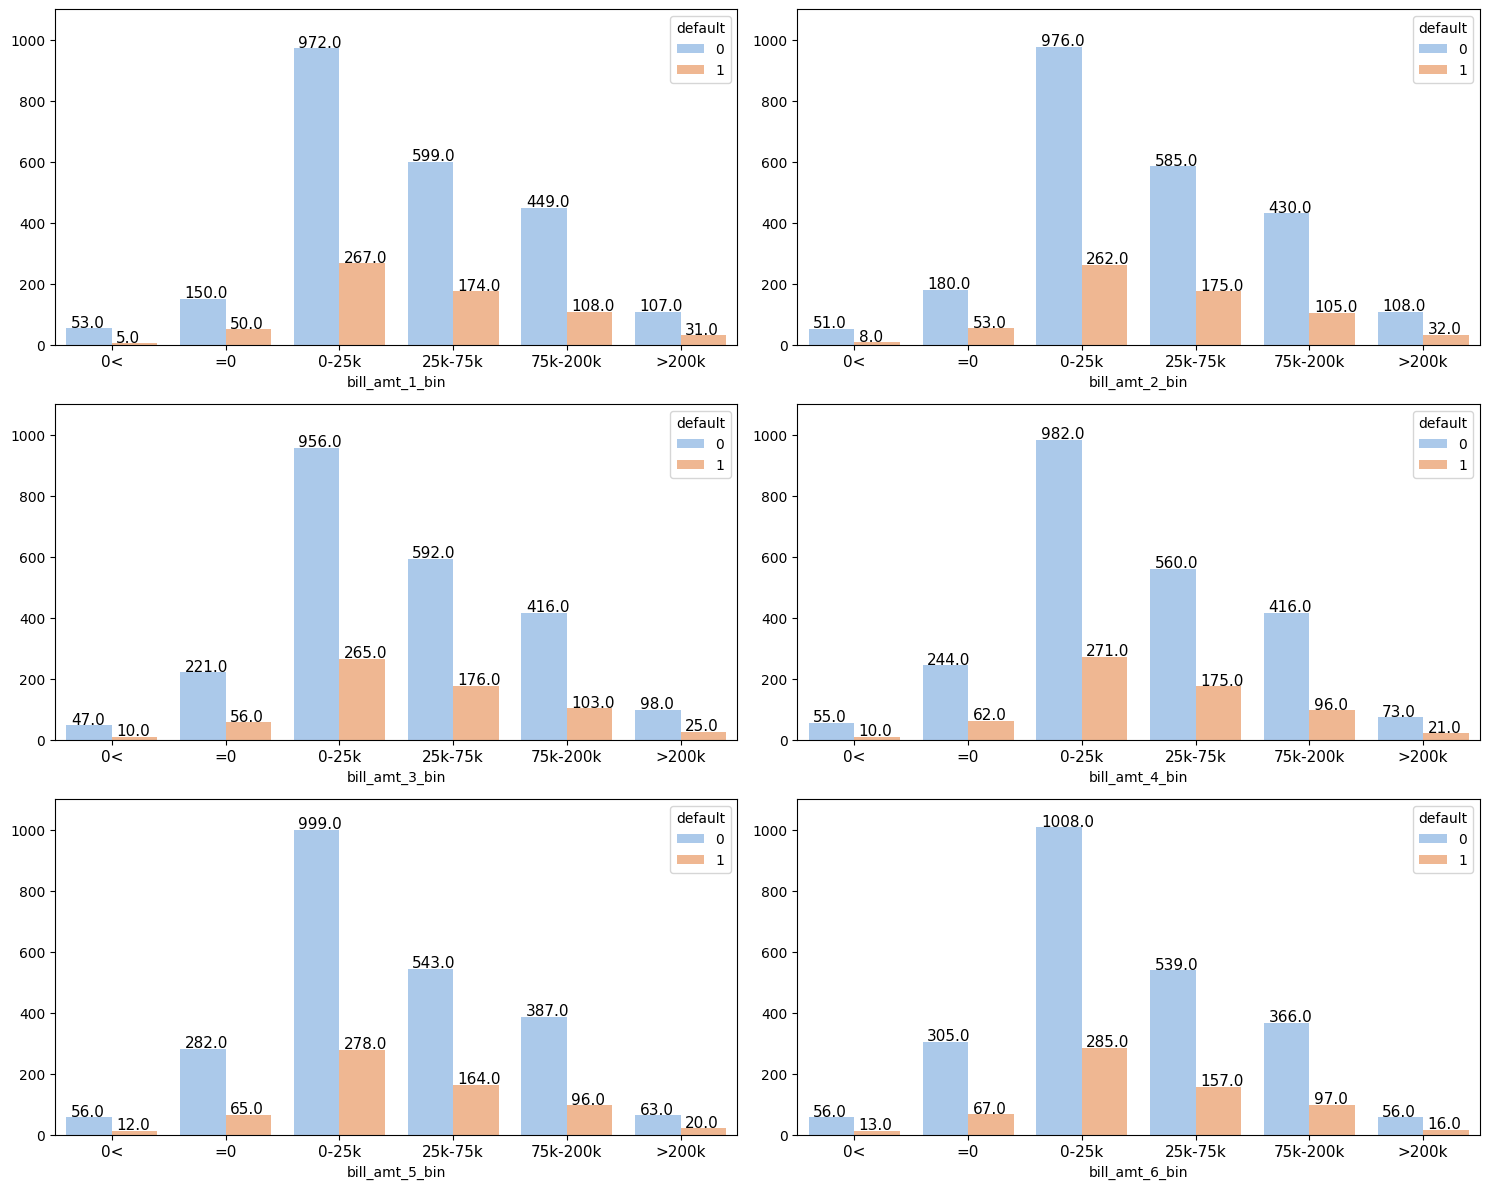

In [68]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue="default", palette = 'pastel')
    plt.ylim(0,1100)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0<', '=0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+5), fontsize = 11)

plt.show()

Observasi:
- bill statement yang paling banyak melakukan default adalah pada bill statement 0-25k

## 6 Feature Engineering

In [69]:
#panggil lagi data df2 setelah direname dan tidak terduplikasi sebelum visualisasi data.
df=df2.copy()

In [70]:
# tampilkan nama kolom pada df
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default'],
      dtype='object')

### split X features, y Target

In [71]:
#split data menjadi X, y
X= df.drop(['default'], axis=1)
y=df['default']

In [72]:
#tampilkan data X
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


In [73]:
#tampilkan data y
y

0       1
1       0
2       1
3       0
4       0
       ..
2960    0
2961    1
2962    1
2963    0
2964    0
Name: default, Length: 2965, dtype: int64

### Split Train-set dan Test-Set

In [74]:
#spliting antara train-set dan test-set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train.head()

Train Size :  (2372, 23)
Test Size :  (593, 23)


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2406,390000.0,2,2,1,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7599.0,2947.0,86790.0,3628.0,4644.0,7677.0,2947.0,87476.0,3639.0,7769.0
557,180000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,...,49475.0,50840.0,50090.0,48345.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1039,130000.0,2,2,2,26.0,2.0,0.0,0.0,0.0,0.0,...,126264.0,128318.0,96428.0,98156.0,6000.0,5200.0,5000.0,3500.0,3622.0,3920.0
561,50000.0,1,2,2,27.0,0.0,0.0,0.0,0.0,0.0,...,50297.0,36164.0,37616.0,39062.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0
2364,320000.0,1,2,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,4144.0,6290.0,977.0,-23.0,5318.0,4160.0,6296.0,977.0,23.0,0.0


### Handle Outlier

In [75]:
X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

<Axes: >

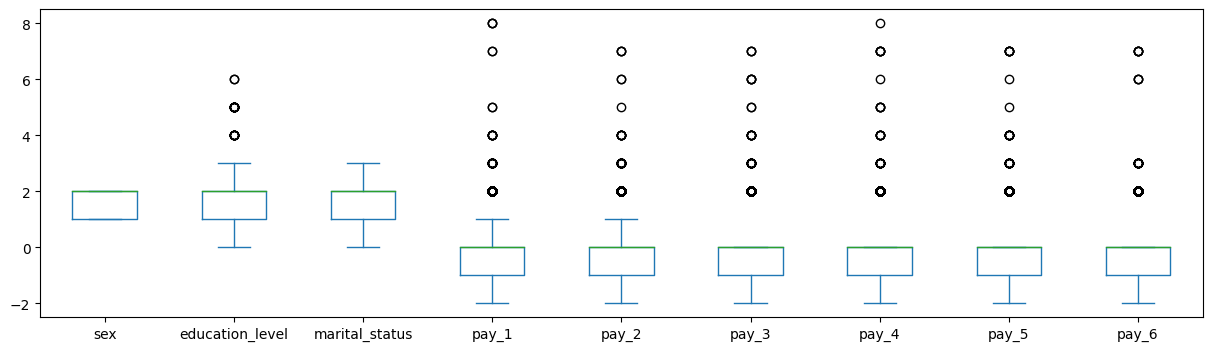

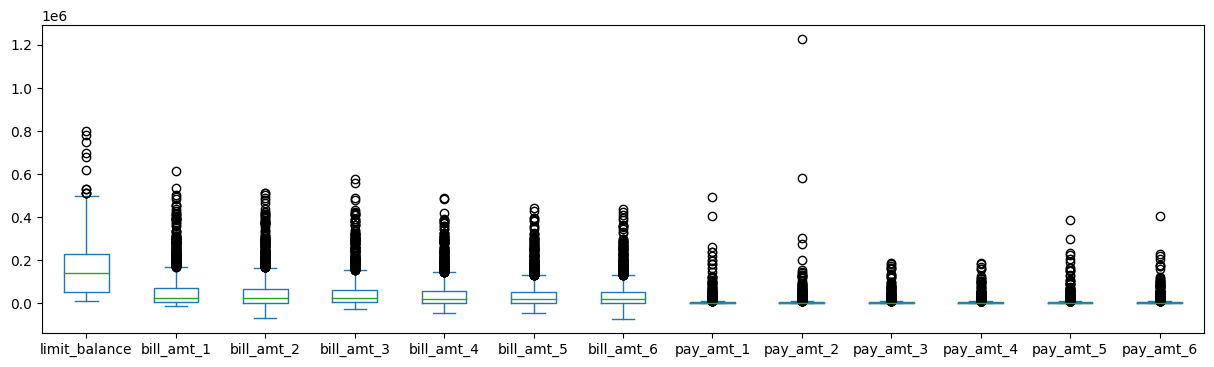

In [76]:
X_train[['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].plot.box(figsize=(15, 4))
X_train[['limit_balance','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']].plot.box(figsize=(15, 4))

In [77]:
# Cek outlier pada tipe data numerik
numeric_columns = X_train.select_dtypes(include=[np.number])

# Menghitung IQR untuk kolom numerik
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outliers pada kolom numerik
outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

# Menghitung jumlah outliers dalam setiap kolom numerik
outliers_count = outliers.sum()
#hitung
outliers_count

limit_balance       11
sex                  0
education_level     30
marital_status       0
age                 19
pay_1              250
pay_2              337
pay_3              318
pay_4              282
pay_5              251
pay_6              262
bill_amt_1         180
bill_amt_2         187
bill_amt_3         184
bill_amt_4         166
bill_amt_5         188
bill_amt_6         181
pay_amt_1          220
pay_amt_2          235
pay_amt_3          211
pay_amt_4          219
pay_amt_5          231
pay_amt_6          197
dtype: int64

In [78]:
X_train.describe()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,...,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000
mean,164532.040472,1.606661,1.845700,1.557757,35.150927,0.001265,-0.126897,-0.149241,-0.182125,-0.226813,...,49302.692243,44659.085160,41334.188449,40395.113406,6401.094013,6.669832e+03,5140.202361,4519.059022,5114.364671,5338.639545
std,125995.287824,0.488594,0.768289,0.519987,9.014304,1.132510,1.193050,1.188510,1.178917,1.163187,...,69941.742541,62921.508257,59100.079429,58314.892723,21199.581147,3.174601e+04,13759.960650,12814.281823,17795.328405,17283.621131
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3437.250000,2585.000000,2009.750000,1429.250000,1000.000000,1.000000e+03,476.750000,300.000000,316.000000,161.500000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22396.500000,20230.000000,19011.000000,18596.000000,2284.000000,2.220000e+03,2000.000000,1637.000000,1700.000000,1700.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63662.250000,58950.500000,53711.250000,53393.250000,5100.000000,5.090250e+03,4647.750000,4000.000000,4091.000000,4100.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,188841.000000,184637.000000,388071.000000,403500.000000


Observasi:
- Pada dataset ini terdeksi outlier pada 11 fitur, namun data outlier tersebut tidak akan dimanipulasi karena data-data tersebut masuk akal.
- Limit balance: tidak semua orang diberikan limit_balance yang tinggi dari bank. Limit ini tergantung dari history dan keinginan bank memberikan limit pada client
-  pada outlier demografik (sex, education_level, marital_status, dan age) merupakan data kategori, sehingga data yang terdeteksi outlier, sebenarnya bukan outlier hanya nilai kategori saja.
- sama halnya dengan fitur demografik, pay(1,2,3,4,5,6) juga merupakan data kategori sehingga outlier yang terdeksi bukanlah outlier melainkan urutan encoding data.
- pada limit_balance, bill_amt(1,2,3,4,5,6) and pay_amt(1,2,3,4,5,6) merupakan jumlah uang. Dan aliran/jumlah uang pengeluaran/tagihan,dll tergantung dari clientnya dan outlier tersebut masuk akal karena tiap data client berbeda-beda



---



### Handle Missing Values

In [79]:
# Check Missing Values pada `X_train`

X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [80]:
# Check Missing Values pada  `X_test`

X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [81]:
# Check Missing Values pada `y_train`

y_train.isnull().sum()

0

In [82]:
# Check Missing Values pada `y_test`

y_test.isnull().sum()

0

Observasi:
- keseluruhan data train dan test set tidak ada yang punya missing value

### Feature Selection

In [83]:
#Tampilkan data X_train
X_train.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2406,390000.0,2,2,1,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7599.0,2947.0,86790.0,3628.0,4644.0,7677.0,2947.0,87476.0,3639.0,7769.0
557,180000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,...,49475.0,50840.0,50090.0,48345.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1039,130000.0,2,2,2,26.0,2.0,0.0,0.0,0.0,0.0,...,126264.0,128318.0,96428.0,98156.0,6000.0,5200.0,5000.0,3500.0,3622.0,3920.0
561,50000.0,1,2,2,27.0,0.0,0.0,0.0,0.0,0.0,...,50297.0,36164.0,37616.0,39062.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0
2364,320000.0,1,2,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,4144.0,6290.0,977.0,-23.0,5318.0,4160.0,6296.0,977.0,23.0,0.0


In [84]:
#Tampilkan data y_train
y_train.head()

2406    0
557     1
1039    1
561     1
2364    0
Name: default, dtype: int64

### Split Numerik Kolom dan Kategori Kolom

In [85]:
#ambil nilai numerik dan kolom numerik
num_columns= X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns=X_train.select_dtypes(include=['object']).columns.tolist()
print('Num columns:', num_columns)
print('Cat columns:', cat_columns)

Num columns: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat columns: []


In [86]:
X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [87]:
#definisikan data nilai numerik dan kolom kategorikal
num_columns=['limit_balance','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
cat_columns=['sex', 'education_level', 'marital_status', 'age','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
print('num_columns:', num_columns)
print('cat_columns:', cat_columns)

num_columns: ['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_columns: ['sex', 'education_level', 'marital_status', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Observasi:
- karena semua data kategori telah diencoding dari datasetnya, maka data kategori akan langsung di merge dengan data numerik setelah data numerik dilakukan scalling pada pipeline

- flow num_columns pada kasus ini:

    - X_train_num --> scalling--> merge X_train_cat


### split train-set dan test-set berdasarkan tipe kolom

In [88]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#print jumlah data masing-masing test dan train untuk num dan cat
print('X_train_num', X_train_num.shape)
print('X_train_cat', X_train_cat.shape)
print('X_test_num', X_test_num.shape)
print('X_test_cat', X_test_cat.shape)

X_train_num (2372, 13)
X_train_cat (2372, 10)
X_test_num (593, 13)
X_test_cat (593, 10)


In [89]:
#tampilkan data train_num
X_train_num.head()

,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2406,390000.0,8243.0,4610.0,7599.0,2947.0,86790.0,3628.0,4644.0,7677.0,2947.0,87476.0,3639.0,7769.0
557,180000.0,126937.0,109884.0,49475.0,50840.0,50090.0,48345.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1039,130000.0,130535.0,127155.0,126264.0,128318.0,96428.0,98156.0,6000.0,5200.0,5000.0,3500.0,3622.0,3920.0
561,50000.0,47452.0,48663.0,50297.0,36164.0,37616.0,39062.0,2000.0,2500.0,2000.0,2000.0,2000.0,2000.0
2364,320000.0,1471.0,5184.0,4144.0,6290.0,977.0,-23.0,5318.0,4160.0,6296.0,977.0,23.0,0.0


In [90]:
#tampilkan data train_cat
X_train_cat.head()

,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
2406,2,2,1,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
557,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,2,2,2,26.0,2.0,0.0,0.0,0.0,0.0,0.0
561,1,2,2,27.0,0.0,0.0,0.0,0.0,0.0,0.0
2364,1,2,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [91]:
#tampilkan data test_cat
X_test_num.head()

,limit_balance,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1765,60000.0,56166.0,58022.0,61331.0,55566.0,59331.0,60569.0,2760.0,4941.0,0.0,4675.0,2361.0,0.0
525,50000.0,17771.0,18794.0,19062.0,19443.0,19849.0,20287.0,1311.0,1299.0,680.0,703.0,750.0,626.0
1456,10000.0,3646.0,7374.0,6714.0,4432.0,6652.0,6095.0,4000.0,0.0,2000.0,3000.0,0.0,3870.0
929,60000.0,58117.0,53986.0,47413.0,36527.0,28170.0,28963.0,2400.0,2050.0,2011.0,1200.0,1400.0,1200.0
854,140000.0,99296.0,89391.0,79173.0,43370.0,28850.0,17896.0,3205.0,2894.0,2000.0,1500.0,1000.0,2000.0


In [92]:
#tampilkan data test_cat
X_test_cat.head()

,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
1765,2,2,1,42.0,0.0,0.0,0.0,2.0,2.0,2.0
525,1,2,2,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,2,2,2,22.0,-1.0,-1.0,2.0,0.0,0.0,2.0
929,2,2,2,26.0,0.0,0.0,0.0,0.0,0.0,0.0
854,2,2,1,28.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

Feature scalling dilakukan agar semua nilai numerical data pada dataset memiliki rentang nilai (scale) yang sama. Sehingga dilakukan scalling pada X_train_num dan X_test_num. Scaller yang digunakan adalah standardscaler karena yang ingin diperhatikan adalah nilai meannya.

In [93]:
# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
print('X_train_num_scaled:', X_train_num_scaled.shape)
print('X_test_num_scaled:',X_test_num_scaled.shape)

X_train_num_scaled: (2372, 13)
X_test_num_scaled: (593, 13)


In [94]:
X_train_num_scaled

array([[ 1.78987251e+00, -6.02468423e-01, -6.47214336e-01, ...,
         6.47515283e+00, -8.29248965e-02,  1.40646043e-01],
       [ 1.22792061e-01,  1.00392636e+00,  8.05833745e-01, ...,
        -1.96623597e-01, -1.75047141e-01, -1.93208559e-01],
       [-2.74131854e-01,  1.05262139e+00,  1.04421733e+00, ...,
        -7.95420230e-02, -8.38804048e-02, -8.20973028e-02],
       ...,
       [-5.91670987e-01, -6.08924101e-01, -5.20534669e-01, ...,
         6.09558661e-02, -6.42802332e-03, -1.40372842e-01],
       [-6.71055770e-01,  3.41995997e-01,  3.84345730e-01, ...,
        -4.05148316e-02, -6.42802332e-03,  9.06329911e-01],
       [-1.15362288e-01,  1.01017903e+00,  1.01219545e+00, ...,
        -7.50929232e-02,  4.57876968e-02, -3.07618430e-01]])

### Feature Encoding

Feature encoding pada kasus ini langsung dilakukan transformasi karena daari dataset telah secara default berupa encoding data.

In [95]:
#feature encoding
X_train_cat_encoded= X_train_cat.to_numpy()
X_test_cat_encoded= X_test_cat.to_numpy()
print('X_train_cat_encoded:', X_train_cat_encoded.shape)
print('X_test_cat_encoded:', X_test_cat_encoded.shape)

X_train_cat_encoded: (2372, 10)
X_test_cat_encoded: (593, 10)


In [96]:
#tampilkan data X_train_cat_encoded
X_train_cat_encoded

array([[ 2.,  2.,  1., ..., -1., -1., -1.],
       [ 1.,  2.,  1., ...,  0.,  0.,  0.],
       [ 2.,  2.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 2.,  2.,  1., ...,  0.,  0.,  0.],
       [ 2.,  1.,  2., ...,  0.,  0.,  0.],
       [ 1.,  2.,  2., ...,  0.,  0.,  0.]])

In [97]:
#tampilkan data X_test_cat_encoded
X_test_cat_encoded

array([[ 2.,  2.,  1., ...,  2.,  2.,  2.],
       [ 1.,  2.,  2., ...,  0.,  0.,  0.],
       [ 2.,  2.,  2., ...,  0.,  0.,  2.],
       ...,
       [ 1.,  2.,  2., ...,  0.,  0.,  0.],
       [ 1.,  1.,  3., ...,  0.,  0.,  0.],
       [ 2.,  1.,  2., ...,  0.,  0., -1.]])

- pastikan jumlah data baris dan kolom setelah diencoding/scalling sudah sama dengan sebelum discalling/encoded

### Concate Kolom Numerik dan Kolom Kategori

In [98]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
print('X_train_final:', X_train_final.shape)
print('X_test_final:', X_test_final.shape)

X_train_final: (2372, 23)
X_test_final: (593, 23)


In [99]:
#tampilkan X_train_final
X_train_final

array([[ 1.78987251, -0.60246842, -0.64721434, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.12279206,  1.00392636,  0.80583374, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27413185,  1.05262139,  1.04421733, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59167099, -0.6089241 , -0.52053467, ...,  0.        ,
         0.        ,  0.        ],
       [-0.67105577,  0.341996  ,  0.38434573, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11536229,  1.01017903,  1.01219545, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
#tampilkan X_train_final
X_test_final

array([[-0.82982534,  0.0461175 ,  0.09000667, ...,  2.        ,
         2.        ,  2.        ],
       [-0.90921012, -0.47351726, -0.45143918, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22674925, -0.66468384, -0.60906413, ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 1.55171816,  3.09712261,  3.17012519, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11536229,  0.75350829,  0.82369423, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59167099,  0.43242963,  0.49458658, ...,  0.        ,
         0.        , -1.        ]])

- pastikan jumlah data X_train_final dan X_test_final memiliki jumlah yang sama dengan X_train dan X_test sebelum dilakukan encoding/ scalling

## 8 Model Definition

Prediksi default menggunakan 20% data test dan 80% data train dengan menggunakan algoritma seperti berikut.
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KKN
- Naive Bayes

Selain itu, perlu dilakukan
- Hypermeter Tuning
- Cross Validation


### Null Accuracy

Sebelum melakukan pemodelan, sebaiknya dilakukan pengecekan nilai akurasi pada nilai null terlebih dahulu untuk mengetahui apakah pemodelan yang dilakukan sudah lebih baik sebelum dan sudah dilakukan pemodelan

In [101]:
# hitung data y_test
y_test.value_counts()

0    477
1    116
Name: default, dtype: int64

In [102]:
#tampilkan data null
null_accuracy= y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1])
null_accuracy

0.8043844856661045

Selanjutnya, perlu dilakukan pengecekan dengan confusion matrix untuk mengetahui performasi dari model dan jenis error yang dihasilkan oleh model.


* Binary:
  - 1: tidak default
  - 0: default


Observasi:
- Berdasarkan informasi diatas, dapat disimpulkan bahwa pemodelan yang dilakukan harus memiliki tingkat akurasi yang lebih tinggi dari null accuracy yaitu diatas 0.78 (78%).



---



### Algoritma Pemodelan

Logistic Regression digunakan untuk mengklasifikasikan data dan memodelkan probabilitas. Pada pemodelan ini, dilakukan percobaan pemodelan pada logistic regression untuk mengetahui apakah suatu client akan default(0) atau tidak(1).

Selain mudah untuk diimplementasikan pada data train, model ini sangat efisien dan cepat dalam memodelkan data. Meskipun demikian, karena sifatnya tidak adaptif, sehingga kemungkinan  tingkat akurasi pada model juga tidak terlalu tinggi. Parameter-parameter yang digunakan menggunakan random_state=1

Berikut adalah parameter yang digunakan pada logistic regression.
  - libliear karena solver ini direkomendasikan untuk dataset yang sangat besar dan memiliki dimensi yang besar juga
  - l1: fungsi penalti dengan menjumlahkan nilai akar parameter agar hasilnya semakin kecil

  > `Best Hyperparameters Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}`

- Pemodelan menggunakan SVM akan dilakukan utnuk mengetahui berapa besar tingkat akurasi jika data-data teresbut membagi dataset ke dalam kelas-kelas untuk menemukan hyperplane marginal maksimum.
  Parameter yang digunakan adalah
  - linear: artinya data-data tersebut akan dipisahkan secara linear dengan batas penalty error C=1
    > `Best Hyperparameters SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}`

- pemodelan menggunakan decisiontree bekerja dengan mem-break down dataset yang kompleks untuk dibagi-bagi menjadi klasifikasi yang lebih simple. Parameter yang digunakan adalah
  -criterion: entropy yaitu dilakukan dengan mengukur ketidakpastian suatu nilai acak dengan maximum kedalaman (depth) sebanyak 2.

    >`Best Hyperparameters DecisionTree: {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__splitter': 'best'}`

- KKN yaitu pemodelan yang memanfaatkan jarak antara data untuk mengelompokkan suatu objek data tersebut. Dengan parameter K=25 berdasarkan best parameter

    >`Best Hyperparameters KKN: {'classifier__n_neighbors': 25}`

- Pemodelan randomforest ini sangat baik untuk data dengan jumlah besar serta dapat mengurangi noise dan outlier. Pemodelan ini bekerja dengan memilih hasil predikasi terbanyak dari leaf. Parameter yang digunakan diantaranya
    > `Best Hyperparameters RandomForest: {'classifier__max_depth': 1, 'classifier__max_features': 0.7000000000000001, 'classifier__n_estimators': 100}`

- Naive Bayes: gaussian ini sangat bagus untuk menghandle data kontinue dengan parameter sebagai berikut;
Best Hyperparameters Multinomial Naive Bayes: {'classifier__priors': None, 'classifier__var_smoothing': 1}

- Cross validation digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi/evaluasi. Pada kasus ini digunakan cross validation =5
    > `cv=5`

### Baseline Model

Baseline model ini melakukan pemodelan dengan default parameter dan tidak dilakukan hyperparameter tunning.

In [103]:
#define random_state
global_random_state=1

In [104]:
#---------------------------------------------------

# Logistic Regression pipeline
logreg_pipelineb = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, random_state=global_random_state))# nilai default max_iter=100 akan terjadi konvergensi karena ada banyak fitur sehingga diganti 1000
])

# SVM pipeline
svm_pipelineb = Pipeline(steps=[
    ('classifier', SVC(random_state=global_random_state))
])

#DecisionTree pipeline
dectree_pipelineb = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=global_random_state))
])

# KKN pipeline
kkn_pipelineb = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())
])

# RandomForest pipeline
rf_pipelineb = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=global_random_state))
])

# Naive Bayes pipeline
mnb_pipelineb = Pipeline(steps=[
    ('classifier', GaussianNB())
])

#---------------------------------------------------

# fit logreg
logreg_pipelineb.fit(X_train_final, y_train)
svm_pipelineb.fit(X_train_final, y_train)
dectree_pipelineb.fit(X_train_final, y_train)
kkn_pipelineb.fit(X_train_final, y_train)
rf_pipelineb.fit(X_train_final, y_train)
mnb_pipelineb.fit(X_train_final, y_train)

# Predict logreg
logreg_predb = logreg_pipelineb.predict(X_test_final)

# Predict SVM
svm_predb = svm_pipelineb.predict(X_test_final)

# Predict DesicionTree
dectree_predb = dectree_pipelineb.predict(X_test_final)

# Predict KKN
kkn_predb = kkn_pipelineb.predict(X_test_final)

# Predict RandomForest
rf_predb = rf_pipelineb.predict(X_test_final)

# Predict Naive Bayes
mnb_predb = mnb_pipelineb.predict(X_test_final)


#### Prediksi Train_set dan Test_set

In [105]:
# Predict Train-Set and Test-Set logreg
logreg_pred_trainb = logreg_pipelineb.predict(X_train_final)
logreg_pred_testb = logreg_pipelineb.predict(X_test_final)


# Predict Train-Set and Test-Set svm
svm_pred_trainb = svm_pipelineb.predict(X_train_final)
svm_pred_testb = svm_pipelineb.predict(X_test_final)


# Predict Train-Set and Test-Set DecisionTree
dectree_pred_trainb = dectree_pipelineb.predict(X_train_final)
dectree_pred_testb = dectree_pipelineb.predict(X_test_final)


# Predict Train-Set and Test-Set KKN
kkn_pred_trainb = kkn_pipelineb.predict(X_train_final)
kkn_pred_testb = kkn_pipelineb.predict(X_test_final)


# Predict Train-Set and Test-Set RandomForest
rf_pred_trainb = rf_pipelineb.predict(X_train_final)
rf_pred_testb = rf_pipelineb.predict(X_test_final)

# Predict Train-Set and Test-Set Naive Bayes
mnb_pred_trainb = mnb_pipelineb.predict(X_train_final)
mnb_pred_testb = mnb_pipelineb.predict(X_test_final)


In [106]:
#Training Akurasi
train_accuracy_logregb=accuracy_score(y_train,logreg_pred_trainb)
print('Train Accuracy logreg base:', train_accuracy_logregb)

train_accuracy_svmb=accuracy_score(y_train,svm_pred_trainb)
print('Train Accuracy svm base:', train_accuracy_svmb)

train_accuracy_decreeb=accuracy_score(y_train,dectree_pred_trainb)
print('Train Accuracy DecisionTree base:', train_accuracy_decreeb)

train_accuracy_kknb=accuracy_score(y_train,kkn_pred_trainb)
print('Train Accuracy kkn base:', train_accuracy_kknb)

train_accuracy_rfb=accuracy_score(y_train,rf_pred_trainb)
print('Train Accuracy RandomForest base:', train_accuracy_rfb)

train_accuracy_mnb=accuracy_score(y_train,mnb_pred_trainb)
print('Train Accuracy Naive Bayes base:', train_accuracy_mnb)

Train Accuracy logreg base: 0.8355817875210793
Train Accuracy svm base: 0.7900505902192243
Train Accuracy DecisionTree base: 1.0
Train Accuracy kkn base: 0.8486509274873525
Train Accuracy RandomForest base: 1.0
Train Accuracy Naive Bayes base: 0.4557335581787521


In [107]:
# Akurasi Model
#Model Evaluation Logistic Regression
accuracy_logregb = accuracy_score(y_test, logreg_predb)
print("Test Logreg accuracy base:", accuracy_logregb)

# Model evaluation SVM
accuracy_svmb = accuracy_score(y_test, svm_predb)
print("Test SVM Precision base:", accuracy_svmb)

# Model evaluation DecisionTree
accuracy_dectreeb = accuracy_score(y_test, dectree_predb)
print("Test DecisionTree accuracy base:", accuracy_dectreeb)

# Model evaluation KKN
accuracy_kknb =accuracy_score(y_test, kkn_predb)
print("Test KKN accuracy base:", accuracy_kknb)

# Model evaluation RandomForest
accuracy_rfb = accuracy_score(y_test, rf_predb)
print("Test RandomForest accuracy base:", accuracy_rfb)

# Model evaluation Naive Bayes
accuracy_mnb = accuracy_score(y_test, mnb_predb)
print("Test Naive Bayes accuracy base:", accuracy_mnb)

Test Logreg accuracy base: 0.8246205733558178
Test SVM Precision base: 0.8094435075885329
Test DecisionTree accuracy base: 0.7571669477234402
Test KKN accuracy base: 0.8026981450252951
Test RandomForest accuracy base: 0.8043844856661045
Test Naive Bayes accuracy base: 0.4114671163575042




---

***Tabel keseluruhan tingkat Akurasi Model Baseline***

|Baseline|Train|Test|
|----|----|----|
|logreg base:| 0.8339|0.8111
|svm base: |0.7900|0.7841
|DecisionTree base:|1.0|0.7183
|kkn base:|0.8419| 0.8077
|RandomForest base:| 1.01.0|0.8364
|Naive Bayes base:| 0.4211|0.4283


---



In [108]:
#Classification Report masing-masing pemodelan
print('LR',classification_report(y_test, logreg_predb))
print('SVM',classification_report(y_test, svm_predb))
print('DT',classification_report(y_test, dectree_predb))
print('KKN',classification_report(y_test, kkn_predb))
print('Rf',classification_report(y_test, rf_predb))
print('NB',classification_report(y_test, mnb_predb))

LR               precision    recall  f1-score   support

           0       0.84      0.96      0.90       477
           1       0.62      0.28      0.38       116

    accuracy                           0.82       593
   macro avg       0.73      0.62      0.64       593
weighted avg       0.80      0.82      0.80       593

SVM               precision    recall  f1-score   support

           0       0.81      1.00      0.89       477
           1       0.80      0.03      0.07       116

    accuracy                           0.81       593
   macro avg       0.80      0.52      0.48       593
weighted avg       0.81      0.81      0.73       593

DT               precision    recall  f1-score   support

           0       0.87      0.82      0.84       477
           1       0.40      0.50      0.45       116

    accuracy                           0.76       593
   macro avg       0.64      0.66      0.65       593
weighted avg       0.78      0.76      0.77       593

KKN      

Observasi:
- Keseluruhan model kecuali Naive bayes base memiliki tingkat akurasi yang lebih tinggi dari null akurasi. Berarti pemodelan sudah berhasil melakukan peningkatan model secara baik.
- pada decision tree nilai akurasi test sangat jauh dibandingkan nilai train. Kemungkinan hal ini disebabkan oleh parameter default dari decision tree tersebut. Sementara untuk Naive bayes baik train maupun test memiliki tingkat akurasi yang rendah kemungkinan karena gaussian model bekerja dengan membuat distribusi tersebut menjadi normal, sehingga terdapat beberap data yang hilang saat proses pemodelan dlaam scikitlearn.
-selain itu, terlihat bahwa ke lima model tersebut semuanya masuk ke dalam  overfit dan underfit. Oleh karena itu perlu dilakukan hyperparameter dan cross validation untuk mengecek, apakah tingkat overfit dan underfit ini bisa diubah menjadi lebih baik lagi.
- Selain itu, terlihat bahwa nilai recall/persen pendeteksi bahwa seseorang itu akan benar memprediksi orang yang default terhadap client yang sesungguhnya default cukup tinggi terkecuali pada Naive Bayes. Diharapkan setelah dilakukan hyperparameter, nilai tersebut dapat meningkat agar tidak banyak kesalahan default pada client

### Pipeline Pemodelan

Selanjutnya dilakukan hyperparameter, gridsearch serta cross validation untuk meningkatkan tingkat akurasi pemodelan.

In [112]:
#---------------------------------------------------

# Logistic Regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression())
])

# SVM pipeline
svm_pipeline = Pipeline(steps=[
    ('classifier', SVC())
])

#DecisionTree pipeline
dectree_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])

# KKN pipeline
kkn_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())
])

# RandomForest pipeline
rf_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

# Gaussian pipeline
mnb_pipeline = Pipeline(steps=[
    ('classifier',  GaussianNB())
])


#---------------------------------------------------
# Hyperparameter grid untuk Logistic Regression
logreg_param_grid = {
    'classifier__C': [0.1, 1,5, 10,100, 1000],
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state':[1]
}
# Hyperparameter grid untuk SVM
svm_param_grid = {
    'classifier__C': [0.0001,0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__random_state':[1]
}

#Hyperparameter grid untuk decisiontree
dectree_param_grid = {
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth' : [2,4,6,8,10,12],
    'classifier__splitter': ['best','random'],
    'classifier__class_weight': ['balanced', None],
    'classifier__ccp_alpha': [0.0001,0.025,0.0000001],
    'classifier__random_state':[1]
}

# Hyperparameter grid untuk KKN
kkn_param_grid = {
    'classifier__n_neighbors': [1,10,20,25,26,30,50]
}

# Hyperparameter grid untuk RandomForest
rf_param_grid = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [1, 2,3,5, 10, 25],
    'classifier__max_features': [*np.arange(0.1, 1.1, 0.1)],
    'classifier__random_state':[1]
}


# Hyperparameter grid untuk Gaussian
mnb_param_grid = {
    'classifier__priors':[None],
    'classifier__var_smoothing' : [1e-09,1,100]
}


#---------------------------------------------------
# Grid Search untuk Logistic Regression
logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train_final, y_train)

# Grid Search untuk SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_final, y_train)

# Grid Search untuk DecisionTree
dectree_grid_search = GridSearchCV(dectree_pipeline, dectree_param_grid, cv=5)
dectree_grid_search.fit(X_train_final, y_train)

# Grid Search untuk KKN
kkn_grid_search = GridSearchCV(kkn_pipeline, kkn_param_grid, cv=5)
kkn_grid_search.fit(X_train_final, y_train)

# Grid Search untuk randomforest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_final, y_train)

# Grid Search untuk Gaussian
mnb_grid_search = GridSearchCV(mnb_pipeline, mnb_param_grid, cv=5)

mnb_grid_search.fit(X_train_final, y_train)

#---------------------------------------------------
# Best hyperparameters untuk Logistic Regression
logreg_best_params = logreg_grid_search.best_params_
print("Best Hyperparameters Logistic Regression:", logreg_best_params)

# Best hyperparameters untuk SVM
svm_best_params = svm_grid_search.best_params_
print("Best Hyperparameters SVM:", svm_best_params)

# Best hyperparameters untuk decisiontree
dectree_best_params = dectree_grid_search.best_params_
print("Best Hyperparameters DecisionTree:", dectree_best_params)

# Best hyperparameters untuk kkn
kkn_best_params = kkn_grid_search.best_params_
print("Best Hyperparameters KKN:", kkn_best_params)

# Best hyperparameters untuk RandomForest
rf_best_params = rf_grid_search.best_params_
print("Best Hyperparameters RandomForest:", rf_best_params)

# Best hyperparameters untuk Gaussian
mnb_best_params = mnb_grid_search.best_params_
print("Best Hyperparameters Multinomial Naive Bayes:", mnb_best_params)

#---------------------------------------------------

# Predict logreg
logreg_pred = logreg_grid_search.predict(X_test_final)

# Predict SVM
svm_pred = svm_grid_search.predict(X_test_final)

# Predict DesicionTree
dectree_pred = dectree_grid_search.predict(X_test_final)

# Predict KKN
kkn_pred = kkn_grid_search.predict(X_test_final)

# Predict RandomForest
rf_pred = rf_grid_search.predict(X_test_final)

# Predict RandomForest
mnb_pred = mnb_grid_search.predict(X_test_final)


Best Hyperparameters Logistic Regression: {'classifier__C': 5, 'classifier__penalty': 'l1', 'classifier__random_state': 1, 'classifier__solver': 'liblinear'}
Best Hyperparameters SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'classifier__random_state': 1}
Best Hyperparameters DecisionTree: {'classifier__ccp_alpha': 0.0001, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__random_state': 1, 'classifier__splitter': 'random'}
Best Hyperparameters KKN: {'classifier__n_neighbors': 10}
Best Hyperparameters RandomForest: {'classifier__max_depth': 3, 'classifier__max_features': 0.6, 'classifier__n_estimators': 100, 'classifier__random_state': 1}
Best Hyperparameters Multinomial Naive Bayes: {'classifier__priors': None, 'classifier__var_smoothing': 1}


---
***OUPUT BEST PARAM***



---



`Best Hyperparameters Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__random_state': 1, 'classifier__solver': 'liblinear'}`

`Best Hyperparameters SVM: {'classifier__C': 10, 'classifier__kernel': 'linear', 'classifier__random_state': 1}`

`Best Hyperparameters DecisionTree: {'classifier__ccp_alpha': 0.0001, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__random_state': 1, 'classifier__splitter': 'best'}`

`Best Hyperparameters KKN: {'classifier__n_neighbors': 10}`

`Best Hyperparameters RandomForest: {'classifier__max_depth': 1, 'classifier__max_features': 0.7000000000000001, 'classifier__n_estimators': 100, 'classifier__random_state': 1}`

`Best Hyperparameters Multinomial Naive Bayes: {'classifier__priors': None, 'classifier__var_smoothing': 1}`



---



Setelah best parameter didapatkan, selanjutnya dilakukan pengecekan tingkat akurasi pada data train dan test

#### Prediksi Tingkat Akurasi pada Train_set dan Test_set

In [113]:
# Predict Train-Set and Test-Set logreg
logreg_pred_train = logreg_grid_search.predict(X_train_final)
logreg_pred_test = logreg_grid_search.predict(X_test_final)


# Predict Train-Set and Test-Set svm
svm_pred_train = svm_grid_search.predict(X_train_final)
svm_pred_test = svm_grid_search.predict(X_test_final)


# Predict Train-Set and Test-Set DecisionTree
kkn_pred_train = kkn_grid_search.predict(X_train_final)
kkn_pred_test = kkn_grid_search.predict(X_test_final)


# Predict Train-Set and Test-Set KKN
kkn_pred_train = kkn_grid_search.predict(X_train_final)
kkn_pred_test = kkn_grid_search.predict(X_test_final)


# Predict Train-Set and Test-Set RandomForest
rf_pred_train = rf_grid_search.predict(X_train_final)
rf_pred_test = rf_grid_search.predict(X_test_final)

# Predict Train-Set and Test-Set decisiontree
dectree_pred_train = dectree_grid_search.predict(X_train_final)
dectree_pred_test = dectree_grid_search.predict(X_test_final)

# Predict Train-Set and Test-Set naive bayes
mnb_pred_train = mnb_grid_search.predict(X_train_final)
mnb_pred_test = mnb_grid_search.predict(X_test_final)

In [114]:
#Training Akurasi
train_accuracy_logreg=accuracy_score(y_train,logreg_pred_train)
print('Train Accuracy logreg :', train_accuracy_logreg)

train_accuracy_svm=accuracy_score(y_train,svm_pred_train)
print('Train Accuracy svm :', train_accuracy_svm)

train_accuracy_decree=accuracy_score(y_train,dectree_pred_train)
print('Train Accuracy DecisionTree:', train_accuracy_decree)

train_accuracy_kkn=accuracy_score(y_train,kkn_pred_train)
print('Train Accuracy kkn :', train_accuracy_kkn)

train_accuracy_rf=accuracy_score(y_train,rf_pred_train)
print('Train Accuracy RandomForest :', train_accuracy_rf)

train_accuracy_rf=accuracy_score(y_train,rf_pred_train)
print('Train Accuracy RandomForest :', train_accuracy_rf)

train_accuracy_mnb=accuracy_score(y_train,mnb_pred_train)
print('Train Accuracy Naive Bayes :', train_accuracy_mnb)

Train Accuracy logreg : 0.8360033726812817
Train Accuracy svm : 0.831787521079258
Train Accuracy DecisionTree: 0.8393760539629005
Train Accuracy kkn : 0.8309443507588533
Train Accuracy RandomForest : 0.8444350758853288
Train Accuracy RandomForest : 0.8444350758853288
Train Accuracy Naive Bayes : 0.7811973018549747


In [115]:
# Akurasi Model
#Model Evaluation Logistic Regression
accuracy_logreg = accuracy_score(y_test, logreg_pred)
print("Test Logreg accuracy:", accuracy_logreg)

# Model evaluation SVM
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Test SVM Precision:", accuracy_svm)

# Model evaluation DecisionTree
accuracy_dectree = accuracy_score(y_test, dectree_pred)
print("Test DecisionTree accuracy:", accuracy_dectree)

# Model evaluation KKN
accuracy_kkn =accuracy_score(y_test, kkn_pred)
print("Test KKN accuracy:", accuracy_kkn)

# Model evaluation RandomForest
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Test RandomForest accuracy :", accuracy_rf)

# Model evaluation Multinomial Naive Bayes
accuracy_mnb = accuracy_score(y_test, mnb_pred)
print("Multinomial Naive Bayes accuracy:", accuracy_mnb)

Test Logreg accuracy: 0.8279932546374368
Test SVM Precision: 0.8178752107925801
Test DecisionTree accuracy: 0.821247892074199
Test KKN accuracy: 0.821247892074199
Test RandomForest accuracy : 0.8195615514333895
Multinomial Naive Bayes accuracy: 0.8043844856661045


***OUTPUT ACCURACY TRAIN***

---



`Train Accuracy logreg : 0.8360033726812817`

`Train Accuracy svm : 0.8343170320404721`

`Train Accuracy DecisionTree: 0.8414839797639123`

`Train Accuracy kkn : 0.8279932546374368`

`Train Accuracy RandomForest : 0.8393760539629005`

`Train Accuracy RandomForest : 0.8393760539629005`

`Train Accuracy Naive Bayes : 0.7866779089376054`


---





---
**OUTPUT ACCURACY TEST**


---
`Test Logreg accuracy: 0.8128161888701517`

`Test SVM Precision: 0.8246205733558178`

`Test DecisionTree accuracy: 0.8195615514333895`

`Test KKN accuracy: 0.821247892074199`

`Test RandomForest accuracy : 0.821247892074199`

`Multinomial Naive Bayes accuracy: 0.7824620573355818`


---



In [117]:
#menampilkan classification report dari masing-masing train dan test
print('Logistic Regression',classification_report(y_test, logreg_pred))
print('SVM',classification_report(y_test, svm_pred))
print('DecisionTree',classification_report(y_test, dectree_pred))
print('KKN',classification_report(y_test, kkn_pred))
print('RandomForest',classification_report(y_test, rf_pred))
print('NaiveBayes',classification_report(y_test, mnb_pred))

Logistic Regression               precision    recall  f1-score   support

           0       0.85      0.96      0.90       477
           1       0.63      0.29      0.40       116

    accuracy                           0.83       593
   macro avg       0.74      0.63      0.65       593
weighted avg       0.81      0.83      0.80       593

SVM               precision    recall  f1-score   support

           0       0.87      0.91      0.89       477
           1       0.54      0.44      0.49       116

    accuracy                           0.82       593
   macro avg       0.71      0.67      0.69       593
weighted avg       0.81      0.82      0.81       593

DecisionTree               precision    recall  f1-score   support

           0       0.85      0.95      0.90       477
           1       0.59      0.28      0.38       116

    accuracy                           0.82       593
   macro avg       0.72      0.62      0.64       593
weighted avg       0.80      0.82    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---


Logistic Regression               precision    recall  f1-score   support

           0       0.82      0.97      0.89       464
           1       0.71      0.23      0.35       129

    accuracy                           0.81       593
   macro avg       0.77      0.60      0.62       593
weighted avg       0.80      0.81      0.77       593

SVM               precision    recall  f1-score   support

           0       0.84      0.96      0.90       464
           1       0.70      0.34      0.46       129

    accuracy                           0.82       593
   macro avg       0.77      0.65      0.68       593
weighted avg       0.81      0.82      0.80       593

DecisionTree               precision    recall  f1-score   support

           0       0.83      0.97      0.89       464
           1       0.71      0.29      0.41       129

    accuracy                           0.82       593
   macro avg       0.77      0.63      0.65       593
weighted avg       0.80      0.82      0.79       593

KKN               precision    recall  f1-score   support

           0       0.83      0.97      0.89       464
           1       0.73      0.29      0.41       129

    accuracy                           0.82       593
   macro avg       0.78      0.63      0.65       593
weighted avg       0.81      0.82      0.79       593

RandomForest               precision    recall  f1-score   support

           0       0.83      0.97      0.89       464
           1       0.71      0.30      0.42       129

    accuracy                           0.82       593
   macro avg       0.77      0.63      0.66       593
weighted avg       0.81      0.82      0.79       593

NaiveBayes               precision    recall  f1-score   support

           0       0.78      1.00      0.88       464
           1       0.00      0.00      0.00       129

    accuracy                           0.78       593
   macro avg       0.39      0.50      0.44       593
weighted avg       0.61      0.78      0.69       593

-----------

***Tabel Pemodelan tingkat akurasi train dan test***

|Pemodelan|Akurasi Train|Akurasi Test|
|----|-----|----|
logreg :| 0.8338|0.8128
svm : |0.8309|0.8314
DecisionTree: |0.8414|0.8195
kkn : |0.8263|0.8145
RandomForest : |0.8617|0.8212
Naive Bayes :| 0.8014|0.8145


Observasi:
- Berdasarkan hyperparameter yang telah dilakukan, ternyata peningkatan tingkat akurasi tidak secara signifikan meningkat kecuali pada gaussian naive bayes.
- Hanya svm dan gaussian naive bayes yang good fit dengan nilai test lebih tinggi daripada train dan tidak memiliki gap yang signifikan oleh karena itu dilakukan cross validation pada model terbaik yaitu, svm

### Cross Validation Stratified

In [118]:
#crossvalidation stratified

kf = KFold(n_splits=5, shuffle=True, random_state=1)
svm_train_cvs = cross_val_score(svm_grid_search, X_train_final, y_train, cv=kf, scoring="accuracy")
print('Crossval train svm:', svm_train_cvs.mean())
svm_test_cvs = cross_val_score(svm_grid_search, X_test_final, y_test, cv=kf, scoring="accuracy")
print('Crossval test svm:', svm_test_cvs.mean())

#------------------------------------------------


Crossval train svm: 0.8313755274261604
Crossval test svm: 0.8077481840193705


Observasi:
- setelah dilakukan cross validation pada svm, ternyata akurasinya tidak mengalami peningkatan. Sehingga pemodelan akhir yang digunakan adalah `svm_pred` dari `svm_best_params`

In [133]:
graph=pd.DataFrame({
    "Actual": y_test,
    "Prediction": svm_pred
}).T

In [134]:
graph.shape

(2, 593)

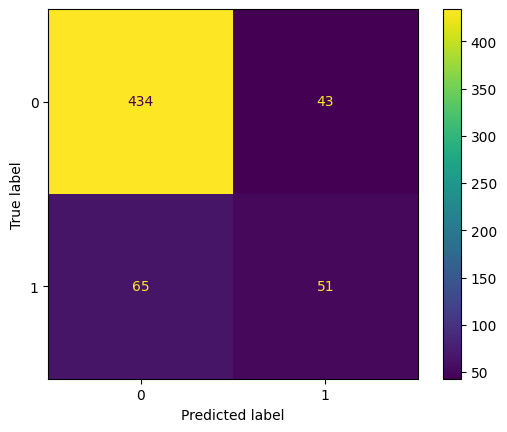

In [135]:
# Konfusi matriks RandomForest
svm_cm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(svm_cm).plot()

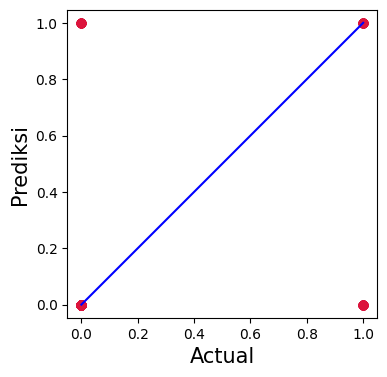

In [136]:
# plot data pred dan test
plt.figure(figsize=(4,4))
plt.scatter(y_test, svm_pred, c='crimson')

p1 = max(max(svm_pred), max(y_test))
p2 = min(min(svm_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Prediksi', fontsize=15)
plt.axis('equal')
plt.show()

Observasi:
- Model dengan tingkat akurasi terbaik dan merupakan goodfit adalah svm.
- tingkat akurasi pemodelan pada train dan test cukup baik yaitu ~ 83%
- titik merak yang jauh dari garis merupakan akibat dari tingka akurasi yang tidak sempurna
- Berdasarkan gambar confusion matrix, terdapat 81 client yang terdeteksi default namun sebenarnya tidak. Sementara terdapat 48 client yang tidak terdeteksi default padahal sebenarnya default.

  - jika 81 client terdeteksi default dan credit card akan secara otomatis ditutup oleh sistem. Client tersebut tidak bisa melakukan aktivitas pembayaran lagi menggunakan credit card. Waktu yang terbuang untuk menyelesaikan masalah ini akan panjang. Selain itu, kemungkinan client tersebut akan pergi/tidak menggunakan jasa credit card akan semakin tinggi. Hal ini dapat membuat kerugian pada perusahaan.
  - sementara itu jika 48 orang default yang tidak terdeteksi default, maka pihak bank akan rugi karena tidak ada perputaran uang/repayment tidak akan dilakukan oleh client hingga ada notice dari bank.

## 9 Model Saving

Selanjutnya dilakukan penyimpanan pada model

In [137]:
# Save Best Parameters


# Save logreg
logreg_model = logreg_grid_search.best_estimator_
joblib.dump(logreg_model, 'logreg_model.pkl')

# Save SVM
svm_model = svm_grid_search.best_estimator_
joblib.dump(svm_model, 'svm_model.pkl')

# Save dectree
dectree_model = dectree_grid_search.best_estimator_
joblib.dump(dectree_model, 'dectree_model.pkl')

# Save kkn
kkn_model = kkn_grid_search.best_estimator_
joblib.dump(kkn_model, 'kkn_model.pkl')

# Save kkn
rf_model = rf_grid_search.best_estimator_
joblib.dump(rf_model, 'rf_model.pkl')

# Save Naive bayes
mnb_model = mnb_grid_search.best_estimator_
joblib.dump(mnb_model, 'mnb_model.pkl')

# Save crossvall
kf_model = kf
joblib.dump(mnb_model, 'kf.pkl')

['kf.pkl']

In [138]:
# Save model

# Save logreg
logreg_model = logreg_grid_search.best_estimator_
joblib.dump(logreg_model, 'logreg_model.pkl')

# Save SVM
svm_model = svm_grid_search.best_estimator_
joblib.dump(svm_model, 'svm_model.pkl')

# Save dectree
dectree_model = dectree_grid_search.best_estimator_
joblib.dump(dectree_model, 'dectree_model.pkl')

# Save kkn
kkn_model = kkn_grid_search.best_estimator_
joblib.dump(kkn_model, 'kkn_model.pkl')

# Save kkn
rf_model = rf_grid_search.best_estimator_
joblib.dump(rf_model, 'rf_model.pkl')

# Save Naive bayes
mnb_model = mnb_grid_search.best_estimator_
joblib.dump(mnb_model, 'mnb_model.pkl')

# Save crossvall
kf_model = kf
joblib.dump(mnb_model, 'kf.pkl')

['kf.pkl']

## 10 Model Inference

Selanjutnya dilakukan dilakukan load data dan input data test/baru

### Load Model

In [139]:
# Load model

# Load logreg model
logreg_load = joblib.load('logreg_model.pkl')

# Load SVM model
svm_load = joblib.load('svm_model.pkl')

# Load dectree model
dectree_load = joblib.load('dectree_model.pkl')

# Load kkn model
kkn_load = joblib.load('kkn_model.pkl')

# Load rf model
rf_load = joblib.load('rf_model.pkl')

# Load naivebayes model
mnb_load = joblib.load('mnb_model.pkl')


### Inferencing

#### Data Baru

In [140]:
#Buat data baru #outpunya ingin bernilai angka
#data inference
data_inf = {
    "limit_balance": 80000,
    "sex": 1,
    "education_level": 1,
    "marital_status": 2,
    "age": 36,

    "pay_1": 1,
    "pay_2": 2,
    "pay_3": 2,
    "pay_4": -2,
    "pay_5": -2,
    "pay_6": -2,

    "bill_amt_1": 167094,
    "bill_amt_2":  86193,
    "bill_amt_3": -25443,
    "bill_amt_4": -46627,
    "bill_amt_5": -46627,
    "bill_amt_6": 5068.0,


    "pay_amt_1": 86193,
    "pay_amt_2": -25443,
    "pay_amt_3": -4662,
    "pay_amt_4":  5068,
    "pay_amt_5":  5068,
    "pay_amt_6": 167094,

}
data_inf = pd.DataFrame([data_inf])
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000,1,1,2,36,1,2,2,-2,-2,...,-25443,-46627,-46627,5068.0,86193,-25443,-4662,5068,5068,167094


In [141]:
# Prediksi dengan logreg
pred1 = logreg_load.predict(data_inf)
pred1

if (pred1 == 0):
    print('default')
else:
    print('not default')

not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [142]:
# Prediksi dengan svm
pred2 = svm_load.predict(data_inf)
pred2

if (pred1 == 0):
    print('default')
else:
    print('not default')

not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [143]:
# Prediksi dengan dectree
pred3 = dectree_load.predict(data_inf)
pred3

if (pred1 == 0):
    print('default')
else:
    print('not default')

not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [144]:
# Prediksi dengan kkn
pred4 = kkn_load.predict(data_inf)
pred4

if (pred1 == 0):
    print('default')
else:
    print('not default')


not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [145]:
# Prediksi dengan rf
pred5 = rf_load.predict(data_inf)
pred5

if (pred1 == 0):
    print('default')
else:
    print('not default')


not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [146]:
# Prediksi dengan mnb
pred6 = mnb_load.predict(data_inf)
pred6
if (pred1 == 0):
    print('default')
else:
    print('not default')

not default


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


## 11 Kesimpulan

Berdasarkan analisis data yang telah dilakukan, pemodelan svm merupakan pemodelan terbaik untuk kasus default kredit card. Tingkat akurasi yang tidak terlalu sempurna dapat menyebabkan kesalahan penentuan client default atau tidak. Pada pemodelan svm, terdapat setidaknya 13% client akan terdeksi default meskipun sebenarnya tidak, dan 8% client yang default namun tidak terdeksi default. Oleh karena itu, pihak bank penyedia jasa credit card tetap harus lebih waspada dan terus mengecek ulang apakah client-client yang default sesungguhnya default atau tidak.
